In [19]:
import warnings
warnings.filterwarnings("ignore")
import pandas, numpy, matplotlib.pyplot as plt, os, seaborn
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)

import plotly.express as px  
import plotly.graph_objects as go
import datetime
from sklearn import metrics,model_selection, feature_selection, utils,decomposition,preprocessing, pipeline
from sklearn import ensemble, linear_model, tree, naive_bayes, svm, neural_network
from sklearn.utils import resample
from IPython.display import display, HTML

from scipy.stats import ttest_ind as scptt 
from statsmodels.stats.weightstats import ttest_ind as sttst
from scipy.stats import chi2_contingency

import pickle

## Data Reading

In [2]:
act_dtqueu,dtqueu=[], []
for x in os.listdir(os.getcwd()):
    if 'Salaries' in x:
        cdt=pandas.read_csv(x)
        cdt1=cdt.copy()
        act_dtqueu.append(cdt1)
        cdt.columns=['Department','Department Name','Division','Gender','Base Salary','Overtime Pay','Longevity Pay','Grade']
        dtqueu.append(cdt)
act_dtqueu[0].head(3)

Department              Department Name                   Division Gender  \
0        BOA  Board of Appeals Department  Board of Appeals Division      F   
1        BOA  Board of Appeals Department  Board of Appeals Division      F   
2        BOA  Board of Appeals Department         Executive Director      F   

   Base Salary  2019 Overtime Pay  2019 Longevity Pay Grade  
0     78902.00                0.0                 0.0    18  
1     58481.91                0.0                 0.0    16  
2    144751.00                0.0                 0.0    M3

In [3]:
dtqueu[1].head(3)

Department            Department Name                  Division Gender  \
0        ABS  Alcohol Beverage Services  Wholesale Administration      F   
1        ABS  Alcohol Beverage Services   Administrative Services      F   
2        ABS  Alcohol Beverage Services            Administration      M   

   Base Salary  Overtime Pay  Longevity Pay Grade  
0      78902.0        199.17           0.00    18  
1      35926.0          0.00        4038.91    16  
2     167345.0          0.00           0.00    M2

In [4]:
dtqueu[2]

Department                                    Department Name  \
0           ABS                          Alcohol Beverage Services   
1           ABS                          Alcohol Beverage Services   
2           ABS                          Alcohol Beverage Services   
3           ABS                          Alcohol Beverage Services   
4           ABS                          Alcohol Beverage Services   
...         ...                                                ...   
9902        TBS  Department of Technology and Enterprise Busine...   
9903        ZAH       Office of Zoning and Administrative Hearings   
9904        ZAH       Office of Zoning and Administrative Hearings   
9905        ZAH       Office of Zoning and Administrative Hearings   
9906        ZAH       Office of Zoning and Administrative Hearings   

                                          Division Gender  Base Salary  \
0                                     Beer Loading      M     87969.00   
1              Liquor and Wine Delivery Operations      M     80086.00   
2                         Beer Delivery Operations      M     80086.00   
3                         Beer Delivery Operations      M     70814.00   
4       Stock Liquor and Wine Warehouse Operations      M     76419.00   
...                                            ...    ...          ...   
9902                 CIO Chief Information Officer      F    217000.00   
9903  Office of Zoning and Administrative Hearings      F     72885.67   
9904            Zoning and Administrative Hearings      F     92211.00   
9905            Zoning and Administrative Hearings      M    142100.00   
9906                                      Director      F    181930.63   

      Overtime Pay  Longevity Pay Grade  
0         32953.25            NaN    20  
1         32656.04        1105.44    18  
2         31369.15        1591.20    18  
3         29837.85            NaN    18  
4         21379.22            NaN    17  
...            ...            ...   ...  
9902           NaN            NaN     0  
9903           NaN            NaN    18  
9904           NaN            NaN    21  
9905           NaN            NaN    35  
9906           NaN            NaN     0  

[9907 rows x 8 columns]

In [5]:
incdata=pandas.concat(dtqueu).reset_index(drop=True)
incdata

Department                                    Department Name  \
0            BOA                        Board of Appeals Department   
1            BOA                        Board of Appeals Department   
2            BOA                        Board of Appeals Department   
3            BOE                                 Board of Elections   
4            BOE                                 Board of Elections   
...          ...                                                ...   
29965        TBS  Department of Technology and Enterprise Busine...   
29966        ZAH       Office of Zoning and Administrative Hearings   
29967        ZAH       Office of Zoning and Administrative Hearings   
29968        ZAH       Office of Zoning and Administrative Hearings   
29969        ZAH       Office of Zoning and Administrative Hearings   

                                           Division Gender  Base Salary  \
0                         Board of Appeals Division      F     78902.00   
1                         Board of Appeals Division      F     58481.91   
2                                Executive Director      F    144751.00   
3                                          Director      F    183654.18   
4                          Polling Place Management      F     62488.00   
...                                             ...    ...          ...   
29965                 CIO Chief Information Officer      F    217000.00   
29966  Office of Zoning and Administrative Hearings      F     72885.67   
29967            Zoning and Administrative Hearings      F     92211.00   
29968            Zoning and Administrative Hearings      M    142100.00   
29969                                      Director      F    181930.63   

       Overtime Pay  Longevity Pay Grade  
0               0.0            0.0    18  
1               0.0            0.0    16  
2               0.0            0.0    M3  
3               0.0            0.0    M1  
4               0.0            0.0    13  
...             ...            ...   ...  
29965           NaN            NaN     0  
29966           NaN            NaN    18  
29967           NaN            NaN    21  
29968           NaN            NaN    35  
29969           NaN            NaN     0  

[29970 rows x 8 columns]

## Data Cleaning

In [6]:
def TreatMissing(incm):
    print("==============================================")
    print("----------------------------------------------")
    print("Missing Values Before Cleaning")
    print(incm.isnull().sum())
    msincm=sum(incm.isnull().sum())
    print("----------------------------------------------")
    print("Total Missing Values Before Cleaning: {}".format(msincm))
    print("----------------------------------------------")
    catcol=incm.dtypes[incm.dtypes=='object'].index.tolist()
    numcol=incm.dtypes[incm.dtypes!='object'].index.tolist()
    for cc in catcol:
        incm[cc]=incm[cc].fillna(incm[cc].mode()[0])
    for nc in numcol:
        incm[nc]=incm[nc].fillna(incm[nc].mean())
    msincmaft=sum(incm.isnull().sum())
    print("----------------------------------------------")
    print("Missing Values After Cleaning")
    print(incm.isnull().sum())
    print("----------------------------------------------")
    print("Total Missing Values After Cleaning: {}".format(msincmaft))
    print("==============================================")
    return incm
clnd_incdata=TreatMissing(incdata)

----------------------------------------------
Missing Values Before Cleaning
Department            0
Department Name       0
Division              0
Gender                0
Base Salary           0
Overtime Pay       4312
Longevity Pay      7494
Grade                 0
dtype: int64
----------------------------------------------
Total Missing Values Before Cleaning: 11806
----------------------------------------------
----------------------------------------------
Missing Values After Cleaning
Department         0
Department Name    0
Division           0
Gender             0
Base Salary        0
Overtime Pay       0
Longevity Pay      0
Grade              0
dtype: int64
----------------------------------------------
Total Missing Values After Cleaning: 0


In [7]:
clnd_incdata

Department                                    Department Name  \
0            BOA                        Board of Appeals Department   
1            BOA                        Board of Appeals Department   
2            BOA                        Board of Appeals Department   
3            BOE                                 Board of Elections   
4            BOE                                 Board of Elections   
...          ...                                                ...   
29965        TBS  Department of Technology and Enterprise Busine...   
29966        ZAH       Office of Zoning and Administrative Hearings   
29967        ZAH       Office of Zoning and Administrative Hearings   
29968        ZAH       Office of Zoning and Administrative Hearings   
29969        ZAH       Office of Zoning and Administrative Hearings   

                                           Division Gender  Base Salary  \
0                         Board of Appeals Division      F     78902.00   
1                         Board of Appeals Division      F     58481.91   
2                                Executive Director      F    144751.00   
3                                          Director      F    183654.18   
4                          Polling Place Management      F     62488.00   
...                                             ...    ...          ...   
29965                 CIO Chief Information Officer      F    217000.00   
29966  Office of Zoning and Administrative Hearings      F     72885.67   
29967            Zoning and Administrative Hearings      F     92211.00   
29968            Zoning and Administrative Hearings      M    142100.00   
29969                                      Director      F    181930.63   

       Overtime Pay  Longevity Pay Grade  
0          0.000000       0.000000    18  
1          0.000000       0.000000    16  
2          0.000000       0.000000    M3  
3          0.000000       0.000000    M1  
4          0.000000       0.000000    13  
...             ...            ...   ...  
29965   6842.216617    1147.117192     0  
29966   6842.216617    1147.117192    18  
29967   6842.216617    1147.117192    21  
29968   6842.216617    1147.117192    35  
29969   6842.216617    1147.117192     0  

[29970 rows x 8 columns]

## Data Analysis and Visualization

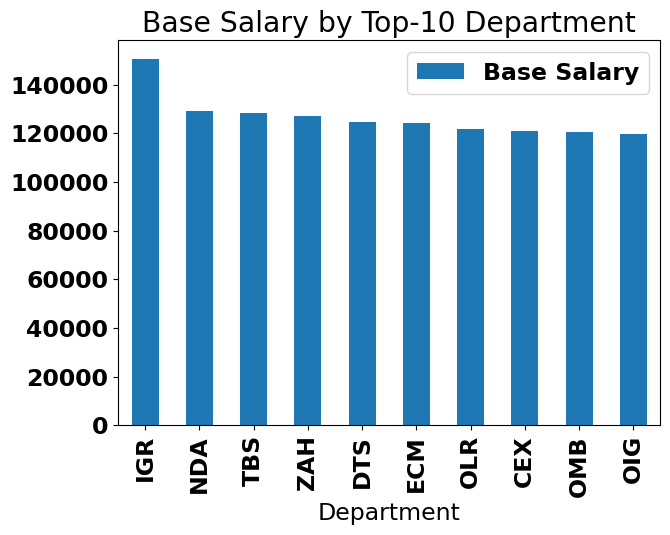

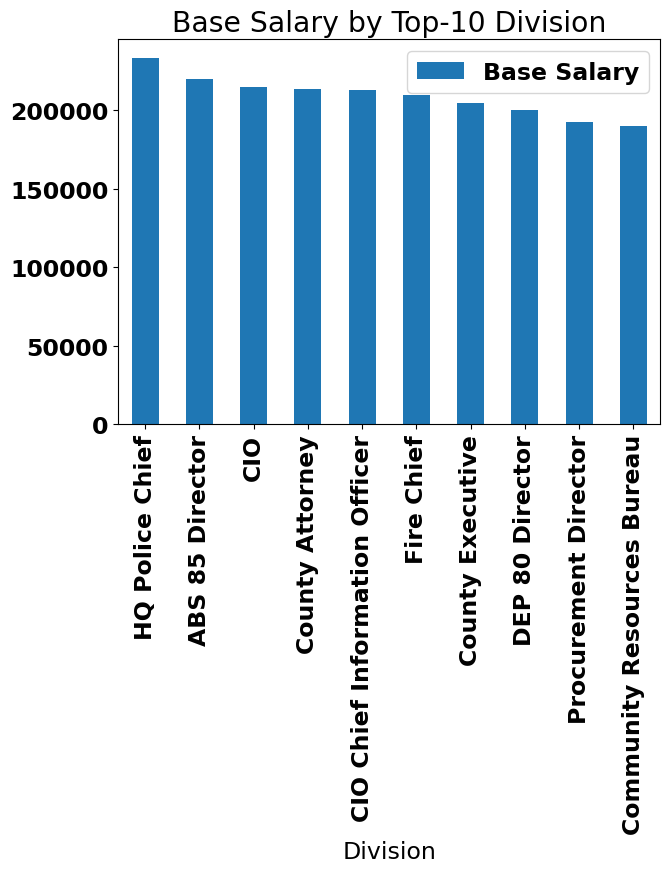

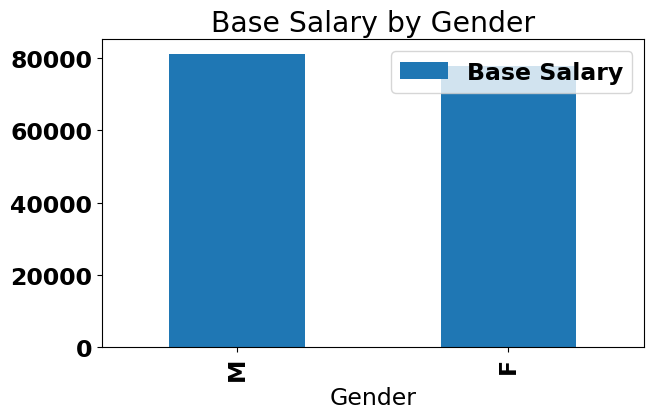

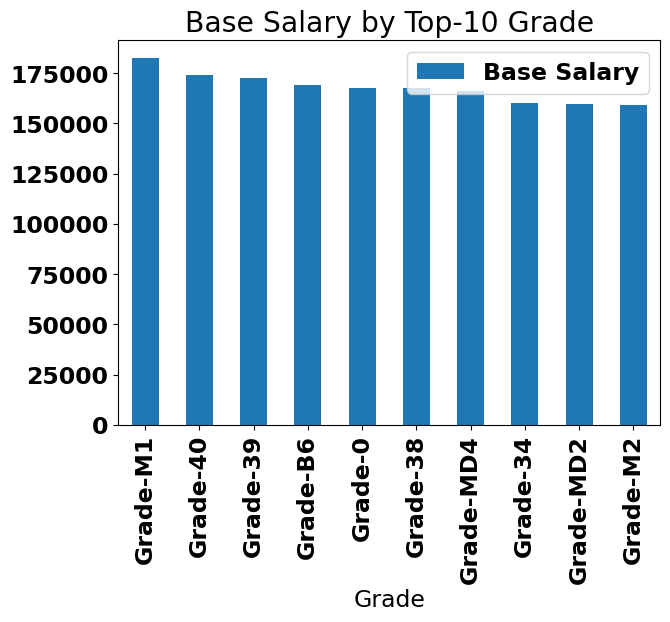

In [8]:
clnd_incdata_vis=clnd_incdata.copy()
dtgrd=clnd_incdata_vis['Grade'].tolist()
for x in range(len(dtgrd)):
    dtgrd[x]="Grade-{}".format(dtgrd[x])
clnd_incdata_vis['Grade']=dtgrd
fts=['Department','Division','Gender','Grade']
for c in range(len(fts)):
    if c!=2:
        clnd_incdata_vis.groupby('{}'.format(fts[c])).agg({"Base Salary":numpy.mean}).sort_values(by=("Base Salary"),
                ascending=False)[:10].plot(kind='bar',figsize=(7,5), title="Base Salary by Top-10 {}".format(fts[c]))
    else:
        clnd_incdata_vis.groupby('{}'.format(fts[c])).agg({"Base Salary":numpy.mean}).sort_values(by=("Base Salary"),
            ascending=False)[:10].plot(kind='bar',figsize=(7,4), title="Base Salary by {}".format(fts[c]))

In [9]:
clnd_incdata

Department                                    Department Name  \
0            BOA                        Board of Appeals Department   
1            BOA                        Board of Appeals Department   
2            BOA                        Board of Appeals Department   
3            BOE                                 Board of Elections   
4            BOE                                 Board of Elections   
...          ...                                                ...   
29965        TBS  Department of Technology and Enterprise Busine...   
29966        ZAH       Office of Zoning and Administrative Hearings   
29967        ZAH       Office of Zoning and Administrative Hearings   
29968        ZAH       Office of Zoning and Administrative Hearings   
29969        ZAH       Office of Zoning and Administrative Hearings   

                                           Division Gender  Base Salary  \
0                         Board of Appeals Division      F     78902.00   
1                         Board of Appeals Division      F     58481.91   
2                                Executive Director      F    144751.00   
3                                          Director      F    183654.18   
4                          Polling Place Management      F     62488.00   
...                                             ...    ...          ...   
29965                 CIO Chief Information Officer      F    217000.00   
29966  Office of Zoning and Administrative Hearings      F     72885.67   
29967            Zoning and Administrative Hearings      F     92211.00   
29968            Zoning and Administrative Hearings      M    142100.00   
29969                                      Director      F    181930.63   

       Overtime Pay  Longevity Pay Grade  
0          0.000000       0.000000    18  
1          0.000000       0.000000    16  
2          0.000000       0.000000    M3  
3          0.000000       0.000000    M1  
4          0.000000       0.000000    13  
...             ...            ...   ...  
29965   6842.216617    1147.117192     0  
29966   6842.216617    1147.117192    18  
29967   6842.216617    1147.117192    21  
29968   6842.216617    1147.117192    35  
29969   6842.216617    1147.117192     0  

[29970 rows x 8 columns]

In [10]:
BpO=[]
BpL=[]
for x in range(len(clnd_incdata)):
    BpO.append(clnd_incdata['Base Salary'][x]+clnd_incdata['Overtime Pay'][x])
    BpL.append(clnd_incdata['Base Salary'][x]+clnd_incdata['Longevity Pay'][x])
clnd_incdata['BpOV']=BpO
clnd_incdata['BpLO']=BpL
clnd_incdata['Total Salary']=numpy.array(clnd_incdata['Base Salary'])+ numpy.array(clnd_incdata['Overtime Pay'])+numpy.array(clnd_incdata['Longevity Pay'])
clnd_incdata['Average Salary']=clnd_incdata['Total Salary']/3

inctrg_lst=clnd_incdata['Base Salary'].tolist()
targetfet=[]
for t in range(len(clnd_incdata)):
    if inctrg_lst[t]>80000:
        targetfet.append('High Income')
    elif (inctrg_lst[t]<80000 and inctrg_lst[t]>50000):
        targetfet.append('Medium High Income')
    elif (inctrg_lst[t]<50000 and inctrg_lst[t]>30000):
        targetfet.append('Average Income')
    else:
        targetfet.append('Low Income')
targetfet=pandas.Series(targetfet)
print(targetfet.value_counts())
clnd_incdata['Salary']=targetfet
clnd_incdata.head()

High Income           13850
Medium High Income    11545
Average Income         3531
Low Income             1044
Name: count, dtype: int64


Department              Department Name                   Division Gender  \
0        BOA  Board of Appeals Department  Board of Appeals Division      F   
1        BOA  Board of Appeals Department  Board of Appeals Division      F   
2        BOA  Board of Appeals Department         Executive Director      F   
3        BOE           Board of Elections                   Director      F   
4        BOE           Board of Elections   Polling Place Management      F   

   Base Salary  Overtime Pay  Longevity Pay Grade       BpOV       BpLO  \
0     78902.00           0.0            0.0    18   78902.00   78902.00   
1     58481.91           0.0            0.0    16   58481.91   58481.91   
2    144751.00           0.0            0.0    M3  144751.00  144751.00   
3    183654.18           0.0            0.0    M1  183654.18  183654.18   
4     62488.00           0.0            0.0    13   62488.00   62488.00   

   Total Salary  Average Salary              Salary  
0      78902.00    26300.666667  Medium High Income  
1      58481.91    19493.970000  Medium High Income  
2     144751.00    48250.333333         High Income  
3     183654.18    61218.060000         High Income  
4      62488.00    20829.333333  Medium High Income

## Class Balancing

In [11]:
maxcnt=clnd_incdata['Salary'].value_counts().tolist()[0]
allcls=clnd_incdata['Salary'].value_counts().index.tolist()
print("Class Labels Before Balancing\n")
print(clnd_incdata['Salary'].value_counts())
blncdf=[]
for x in allcls:
    df=clnd_incdata[clnd_incdata['Salary']==x]
    df=utils.resample(df, replace = True, n_samples = int(len(df)*(maxcnt/len(df))), random_state = 32)
    blncdf.append(df)
clnd_incdata_blnc=pandas.concat(blncdf).reset_index(drop=True)
clnd_incdata_blnc1=utils.resample(clnd_incdata_blnc, replace = True, n_samples = int(len(clnd_incdata_blnc)*2), random_state = 32)
clnd_incdata_blnc1['Salary'].value_counts()

Class Labels Before Balancing

Salary
High Income           13850
Medium High Income    11545
Average Income         3531
Low Income             1044
Name: count, dtype: int64


Salary
Medium High Income    27853
High Income           27801
Average Income        27660
Low Income            27486
Name: count, dtype: int64

## Feature Encoding

In [12]:
def EncodeFets(dtinc):
    fet_to_enc=dtinc.dtypes[dtinc.dtypes=='object'].index.tolist()[:-1]
    print(fet_to_enc)
    if len(fet_to_enc)==0:
        print("Object Type Features Detected in Data!!")
        return dtinc
    else:
        print("All Object Types Features Encoded in Data")
        for c in range(len(fet_to_enc)):
            dtinc[fet_to_enc[c]]=dtinc[fet_to_enc[c]].replace(dtinc[fet_to_enc[c]].unique(),[i+1 for i in range(len(dtinc[fet_to_enc[c]].unique()))])
        dtinc=dtinc.reset_index(drop=True)
        return dtinc
enc_incdata=EncodeFets(clnd_incdata_blnc1)
enc_incdata

['Department', 'Department Name', 'Division', 'Gender', 'Grade']
All Object Types Features Encoded in Data


Department  Department Name  Division  Gender  Base Salary  \
0                1                1         1       1     98389.00   
1                1                1         2       1     19308.84   
2                2                2         3       2     96665.00   
3                3                3         4       2     68575.00   
4                1                1         5       1     52500.00   
...            ...              ...       ...     ...          ...   
110795          27               27       213       1     75023.30   
110796           4                4         7       1     25467.75   
110797           7                7       504       2     91466.00   
110798           1                1        54       2     99865.00   
110799           5                5        17       2     40238.29   

        Overtime Pay  Longevity Pay  Grade           BpOV           BpLO  \
0         190.050000    7277.310000      1   98579.050000  105666.310000   
1        6842.216617    1147.117192      2   26151.056617   20455.957192   
2       10328.950000    1147.117192      3  106993.950000   97812.117192   
3       14782.840000      77.440000      4   83357.840000   68652.440000   
4        1628.210000       0.000000      5   54128.210000   52500.000000   
...              ...            ...    ...            ...            ...   
110795   1402.420000       0.000000      7   76425.720000   75023.300000   
110796      0.000000       0.000000     10   25467.750000   25467.750000   
110797  52108.310000       0.000000     12  143574.310000   91466.000000   
110798    190.020000    7060.430000      1  100055.020000  106925.430000   
110799   2285.690000       0.000000      8   42523.980000   40238.290000   

         Total Salary  Average Salary              Salary  
0       105856.360000    35285.453333         High Income  
1        27298.173808     9099.391269          Low Income  
2       108141.067192    36047.022397         High Income  
3        83435.280000    27811.760000  Medium High Income  
4        54128.210000    18042.736667  Medium High Income  
...               ...             ...                 ...  
110795   76425.720000    25475.240000  Medium High Income  
110796   25467.750000     8489.250000          Low Income  
110797  143574.310000    47858.103333         High Income  
110798  107115.450000    35705.150000         High Income  
110799   42523.980000    14174.660000      Average Income  

[110800 rows x 13 columns]

## Outlier Removal

In [21]:
def DataOutChk(incd,n,w,h,col,txtstr):   
    arrincd=numpy.array(incd.iloc[:,:-1]) 
    pcincd = decomposition.PCA(n_components=n) 
    pcincd.fit(arrincd) 
    pcincdcm=["Comp-{}".format(i+1) for i in range(len(pcincd.explained_variance_ratio_.tolist()))]
    plt.figure(figsize=(w,h))  
    plt.title("Variance(PCA={})\n{} Normalization Data\nMaximum Variance Value: {}".format(n,txtstr,round(max(pcincd.explained_variance_ratio_),8)),fontsize=18)
    plt.bar(pcincdcm,pcincd.explained_variance_ratio_.tolist(),width=0.5,color=col) 
    plt.xlabel("Components",fontsize=14)
    plt.ylabel("Variance",fontsize=14)
    plt.grid()
    plt.show()
    return pcincd.explained_variance_ratio_

def DataNorm(incd): 
    prepproc = preprocessing.MinMaxScaler() 
    incnr=prepproc.fit_transform(incd) 
    return incnr 

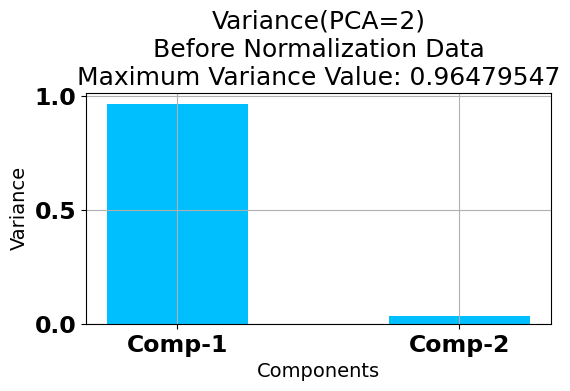

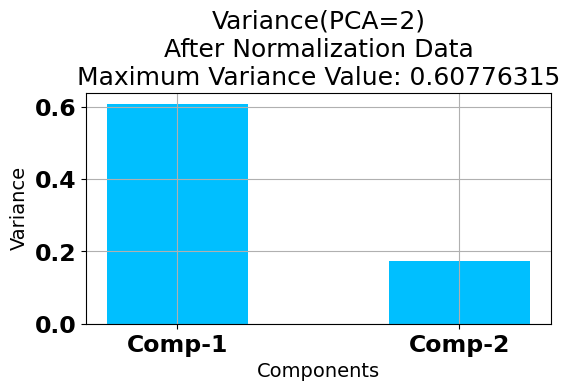

Department  Department Name  Division  Gender  Base Salary  Overtime Pay  \
0     0.00000          0.00000  0.000000     0.0     0.313713      0.000867   
1     0.00000          0.00000  0.001013     0.0     0.048588      0.031197   
2     0.02439          0.02439  0.002026     1.0     0.307933      0.047094   
3     0.04878          0.04878  0.003040     1.0     0.213758      0.067401   
4     0.00000          0.00000  0.004053     0.0     0.159865      0.007424   

   Longevity Pay     Grade      BpOV      BpLO  Total Salary  Average Salary  \
0       0.601411  0.000000  0.280974  0.338111      0.298594        0.298594   
1       0.094800  0.012821  0.063933  0.052434      0.066439        0.066439   
2       0.094800  0.025641  0.306190  0.311779      0.305346        0.305346   
3       0.006400  0.038462  0.235361  0.214018      0.232335        0.232335   
4       0.000000  0.051282  0.147770  0.159865      0.145727        0.145727   

               Salary  
0         High Income  
1          Low Income  
2         High Income  
3  Medium High Income  
4  Medium High Income

In [22]:
edtpc=[]
edtpc.append(DataOutChk(enc_incdata.drop('Salary',axis=1),2,6,3,"#00BFFF","Before"))

fledt=[] 
foutedt=[]  
for rp in edtpc: 
    for r in rp:
        if r>0.6:
            foutedt.append(True)
if len(foutedt)==1 and True in foutedt:
    norm_incdata=DataNorm(enc_incdata.drop('Salary',axis=1))    
norm_incdata=pandas.DataFrame(norm_incdata,columns=enc_incdata.drop('Salary',axis=1).columns.tolist())     
norm_incdata['Salary']=enc_incdata['Salary']

DataOutChk(norm_incdata.drop('Salary',axis=1),2,6,3,"#00BFFF","After")
norm_incdata.head()

## Relationship of Features with Salary

In [23]:
def HypTest(cdf):
    fts=cdf.columns.tolist()[:-1]
    allhyp1,allhyp2=[],[]
    for f in fts:
        hyp1 = scptt(cdf['Salary'], cdf[f],equal_var=True)
        hyp2 = sttst(cdf['Salary'], cdf[f])
        allhyp1.append(hyp1[1])
        allhyp2.append(hyp2[1])
    hypcon=[]
    for x in range(len(allhyp1)):
        if allhyp1[x]<0.05 and allhyp2[x]<0.05:
            hypcon.append("Alternative")
        else:
            hypcon.append("Null")
    HypDF=pandas.DataFrame({"Feature":fts,"P_Scipy":allhyp1,"P-Stats":allhyp2,"Decision":hypcon})
    display(HTML(HypDF.to_html()))

In [24]:
norm_incdata1=norm_incdata.copy()
print(norm_incdata1['Salary'].unique())
norm_incdata1['Salary']=norm_incdata1['Salary'].replace(norm_incdata1['Salary'].unique(),[x+1 for x in range(len(norm_incdata1['Salary'].unique()))])
HypTest(norm_incdata1)

['High Income' 'Low Income' 'Medium High Income' 'Average Income']


In [36]:
fets=norm_incdata1.corr()['Salary'].index.tolist()[:-1]
crs=norm_incdata1.corr()['Salary'].tolist()[:-1]
crsmns=[]
for cr in crs:
    if cr>0 and cr<0.2:
        crsmns.append("Low Correlation (Positive)")
    elif cr>0.2:
        crsmns.append("High Correlation(Positive)")
    elif cr<=-0.2:
            crsmns.append("High Correlation(Negative)")
    elif cr>-0.19 and cr<0:
            crsmns.append("Low Correlation(Negative)")
print(len(crs),len(crsmns))
crfets=pandas.DataFrame({"Feature":fets,"Correlation":crs, "Decision": crsmns})
crfets

12 12


Feature  Correlation                    Decision
0        Department    -0.004125   Low Correlation(Negative)
1   Department Name    -0.004125   Low Correlation(Negative)
2          Division    -0.228994  High Correlation(Negative)
3            Gender     0.055604  Low Correlation (Positive)
4       Base Salary    -0.487715  High Correlation(Negative)
5      Overtime Pay    -0.099349   Low Correlation(Negative)
6     Longevity Pay    -0.295164  High Correlation(Negative)
7             Grade    -0.174007   Low Correlation(Negative)
8              BpOV    -0.470140  High Correlation(Negative)
9              BpLO    -0.493325  High Correlation(Negative)
10     Total Salary    -0.475106  High Correlation(Negative)
11   Average Salary    -0.475106  High Correlation(Negative)

<Axes: title={'center': 'Correlation of Features with Salary'}, ylabel='Feature'>

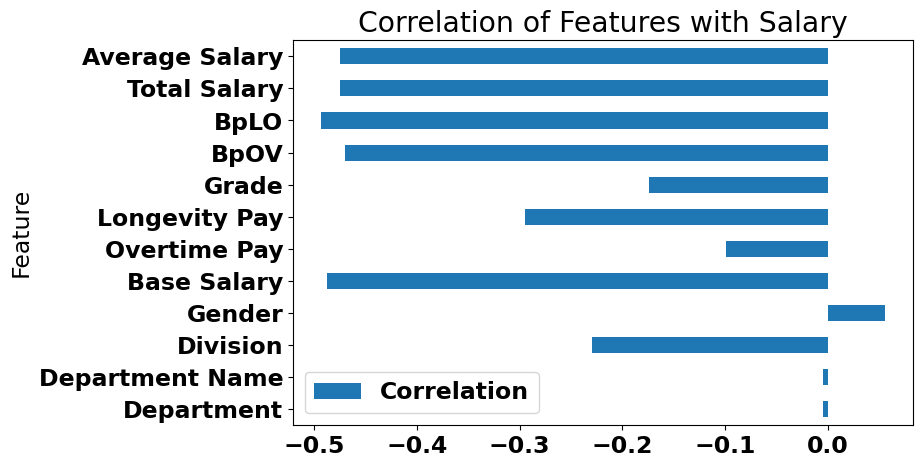

In [49]:
crfets.set_index('Feature').plot(kind='barh', title="Correlation of Features with Salary",figsize=(8,5))

<Axes: title={'center': 'Features with Higher Correlation with Salary'}, ylabel='Feature'>

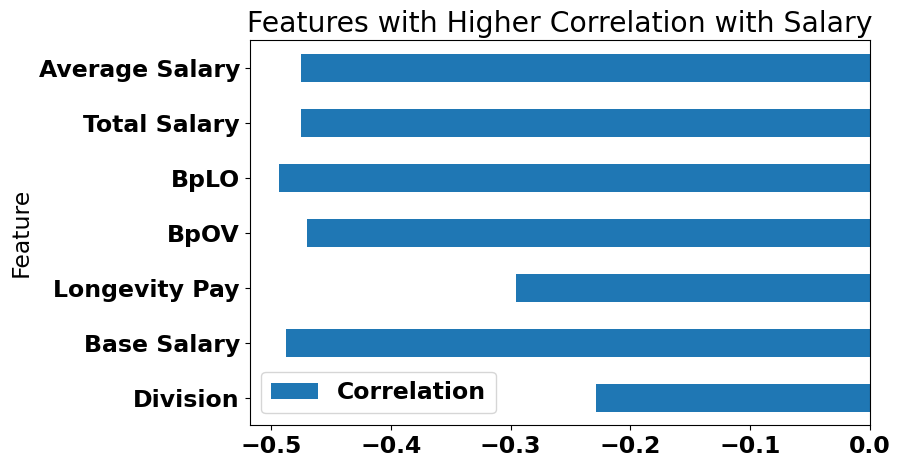

In [50]:
hgfets=crfets.set_index('Feature')
hgfets=hgfets[(hgfets['Decision']=='High Correlation(Negative)')|(hgfets['Decision']=='High Correlation(Positive)')]
hgfets.plot(kind='barh', title="Features with Higher Correlation with Salary",figsize=(8,5))

In [55]:
print(*hgfets.index.tolist(),sep=", ")

Division, Base Salary, Longevity Pay, BpOV, BpLO, Total Salary, Average Salary


## Feature Selection

In [15]:
def ChiFet(indt): 
    print("--------------------------------------------------------------")
    print("Feature Selection Using Chi-Squred")
    print("--------------------------------------------------------------")
    Xindt=indt.drop('Salary',axis=1)  
    Yindt=indt[indt.columns.tolist()[-1]]  
    Yindt=Yindt.replace(Yindt.unique(),[x for x in range(len(Yindt.unique()))])
    chinc=feature_selection.SelectKBest(feature_selection.chi2, k=int(len(indt.columns)*0.8))
    chinc.fit(Xindt, Yindt)   # train model
    print("Selected Features Using Chi-Squred: \n",*Xindt.columns[chinc.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return Xindt.columns[chinc.get_support()] 

In [16]:
def RFEFet(indt):
    print("--------------------------------------------------------------")
    print("Feature Selection Using RFE")
    print("--------------------------------------------------------------")
    Xindt=indt.drop('Salary',axis=1) 
    Yindt=indt[indt.columns.tolist()[-1]] 
    Yindt=Yindt.replace(Yindt.unique(),[x for x in range(len(Yindt.unique()))]) 
    rfinc = feature_selection.RFE(estimator=linear_model.LinearRegression(),n_features_to_select = int(len(indt.columns)*0.8), step = 0.7)
    rfeinc=rfinc.fit(Xindt,Yindt)
    print("Selected Features Using RFE: \n",*Xindt.columns[rfeinc.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return Xindt.columns[rfeinc.get_support()] 

In [17]:
ftfin=[]
chft=ChiFet(norm_incdata)
rfft=RFEFet(norm_incdata) 
for x in chft: 
    if x in rfft: 
        ftfin.append(x)

--------------------------------------------------------------
Feature Selection Using Chi-Squred
--------------------------------------------------------------
Selected Features Using Chi-Squred: 

Department Name
Division
Gender
Base Salary
Longevity Pay
Grade
BpOV
BpLO
Total Salary
Average Salary
--------------------------------------------------------------
--------------------------------------------------------------
Feature Selection Using RFE
--------------------------------------------------------------
Selected Features Using RFE: 

Department
Department Name
Division
Base Salary
Overtime Pay
Longevity Pay
BpOV
BpLO
Total Salary
Average Salary
--------------------------------------------------------------


In [18]:
print("\nFinally Selected Features: \n")
print(*ftfin, sep="\n")


Finally Selected Features: 

Department Name
Division
Base Salary
Longevity Pay
BpOV
BpLO
Total Salary
Average Salary


## Creating Predictor and Target

In [19]:
incprd=norm_incdata[ftfin]
incprd

Department Name  Division  Base Salary  Longevity Pay      BpOV  \
0              0.000000  0.000000     0.313713       0.601411  0.280974   
1              0.000000  0.001013     0.048588       0.094800  0.063933   
2              0.024390  0.002026     0.307933       0.094800  0.306190   
3              0.048780  0.003040     0.213758       0.006400  0.235361   
4              0.000000  0.004053     0.159865       0.000000  0.147770   
...                 ...       ...          ...            ...       ...   
110795         0.634146  0.214792     0.235377       0.000000  0.214588   
110796         0.073171  0.006079     0.069236       0.000000  0.061885   
110797         0.146341  0.509625     0.290503       0.000000  0.415809   
110798         0.000000  0.053698     0.318662       0.583487  0.285397   
110799         0.097561  0.016211     0.118756       0.000000  0.112997   

            BpLO  Total Salary  Average Salary  
0       0.338111      0.298594        0.298594  
1       0.052434      0.066439        0.066439  
2       0.311779      0.305346        0.305346  
3       0.214018      0.232335        0.232335  
4       0.159865      0.145727        0.145727  
...          ...           ...             ...  
110795  0.235377      0.211620        0.211620  
110796  0.069236      0.061029        0.061029  
110797  0.290503      0.410058        0.410058  
110798  0.342333      0.302315        0.302315  
110799  0.118756      0.111434        0.111434  

[110800 rows x 8 columns]

In [20]:
targetfet=norm_incdata['Salary']
targetfet

0                High Income
1                 Low Income
2                High Income
3         Medium High Income
4         Medium High Income
                 ...        
110795    Medium High Income
110796            Low Income
110797           High Income
110798           High Income
110799        Average Income
Name: Salary, Length: 110800, dtype: object

In [21]:
inc_complete=pandas.concat([incprd,targetfet],axis=1)
inc_complete

Department Name  Division  Base Salary  Longevity Pay      BpOV  \
0              0.000000  0.000000     0.313713       0.601411  0.280974   
1              0.000000  0.001013     0.048588       0.094800  0.063933   
2              0.024390  0.002026     0.307933       0.094800  0.306190   
3              0.048780  0.003040     0.213758       0.006400  0.235361   
4              0.000000  0.004053     0.159865       0.000000  0.147770   
...                 ...       ...          ...            ...       ...   
110795         0.634146  0.214792     0.235377       0.000000  0.214588   
110796         0.073171  0.006079     0.069236       0.000000  0.061885   
110797         0.146341  0.509625     0.290503       0.000000  0.415809   
110798         0.000000  0.053698     0.318662       0.583487  0.285397   
110799         0.097561  0.016211     0.118756       0.000000  0.112997   

            BpLO  Total Salary  Average Salary              Salary  
0       0.338111      0.298594        0.298594         High Income  
1       0.052434      0.066439        0.066439          Low Income  
2       0.311779      0.305346        0.305346         High Income  
3       0.214018      0.232335        0.232335  Medium High Income  
4       0.159865      0.145727        0.145727  Medium High Income  
...          ...           ...             ...                 ...  
110795  0.235377      0.211620        0.211620  Medium High Income  
110796  0.069236      0.061029        0.061029          Low Income  
110797  0.290503      0.410058        0.410058         High Income  
110798  0.342333      0.302315        0.302315         High Income  
110799  0.118756      0.111434        0.111434      Average Income  

[110800 rows x 9 columns]

In [22]:
TrainingData=utils.resample(inc_complete, replace = True, n_samples = int(len(inc_complete)*0.75), random_state = 0)
TestData=utils.resample(inc_complete, replace = True, n_samples = int(len(inc_complete)*0.15), random_state = 0)
ValidationData=utils.resample(inc_complete, replace = True, n_samples = int(len(inc_complete)*0.1), random_state = 0)

Trn_IncX=TrainingData.drop('Salary',axis=1)
Tst_IncX=TestData.drop('Salary',axis=1)
Trn_IncY=TrainingData['Salary']
Tst_IncY=TestData['Salary']
Val_IncX=ValidationData.drop('Salary',axis=1)
Val_IncY=ValidationData['Salary']
print("\nTraining Class Distribution")
print(Trn_IncY.value_counts())
print("\nTest Class Distribution")
print(Tst_IncY.value_counts())
print("\nValidation Class Distribution")
print(Val_IncY.value_counts())


Training Class Distribution
Salary
Medium High Income    21004
High Income           20847
Average Income        20658
Low Income            20591
Name: count, dtype: int64

Test Class Distribution
Salary
High Income           4227
Average Income        4142
Low Income            4137
Medium High Income    4114
Name: count, dtype: int64

Validation Class Distribution
Salary
High Income           2821
Average Income        2782
Low Income            2748
Medium High Income    2729
Name: count, dtype: int64


## Model Tuning

In [23]:
IncClsfs=[
    ensemble.RandomForestClassifier(),linear_model.LogisticRegression(),
        tree.DecisionTreeClassifier(),naive_bayes.BernoulliNB(), 
        svm.LinearSVC(), neural_network.MLPClassifier()
]
IDsClsfs=["Random Forest","Logistic Regression","Decision Tree","Naive Bayes", "SVC","ANN"]

tunables=[
    [{'criterion': ['gini', 'entropy'],'max_features':['sqrt', 'log2'],'max_depth':[50,60,70,80,90,100]}],
    [{"tol":[0.01,0.001,0.0001,0.00001],'C':[0.2,0.4,0.6,0.8,1.0],"max_iter":[100,200]}],
    [{"criterion":['gini', 'entropy'],"splitter":['best','random'],"max_features":['sqrt', 'log2']}],
    [{"alpha":[0.2,0.4,0.6,0.8,1.0]}],
    [{"tol":[0.01,0.001,0.0001,0.00001],"C":[0.2,0.4,0.6,0.8,1.0],"max_iter":[50,70,100]}],
    [{"activation":['identity', 'logistic', 'tanh', 'relu'],"learning_rate":['constant', 'invscaling', 'adaptive']}]
]

for ic in range(len(IncClsfs)):
    print("____________________________________________________")
    print("Tuning {} Model =>".format(IDsClsfs[ic]))
    print("____________________________________________________")
    t1 = datetime.datetime.now() 
    gsc = model_selection.GridSearchCV(IncClsfs[ic], tunables[ic], cv = 5, scoring='accuracy')
    gsc.fit(inc_complete.drop('Salary',axis=1), inc_complete['Salary'])
    IncClsfs[ic]=gsc.best_estimator_
    print("Optimum Parameters of {}:\n{}".format(IDsClsfs[ic],gsc.best_estimator_))
    print("____________________________________________________")
    t2 = datetime.datetime.now()
    delta = t2 - t1
    tuningtime=delta.total_seconds()
    print("Tuning Time: {} Seconds".format(tuningtime))
    print("'{}' Tuning Complete........".format(IDsClsfs[ic]))
    print("____________________________________________________")
IncClsfs

____________________________________________________
Tuning Random Forest Model =>
____________________________________________________
Optimum Parameters of Random Forest:
RandomForestClassifier(max_depth=50)
____________________________________________________
Tuning Time: 656.85992 Seconds
'Random Forest' Tuning Complete........
____________________________________________________
____________________________________________________
Tuning Logistic Regression Model =>
____________________________________________________
Optimum Parameters of Logistic Regression:
LogisticRegression(max_iter=200, tol=0.01)
____________________________________________________
Tuning Time: 425.036993 Seconds
'Logistic Regression' Tuning Complete........
____________________________________________________
____________________________________________________
Tuning Decision Tree Model =>
____________________________________________________
Optimum Parameters of Decision Tree:
DecisionTreeClassifier(crite

[RandomForestClassifier(max_depth=50),
 LogisticRegression(max_iter=200, tol=0.01),
 DecisionTreeClassifier(criterion='entropy', max_features='log2'),
 BernoulliNB(alpha=0.2),
 LinearSVC(max_iter=100, tol=0.01),
 MLPClassifier(learning_rate='invscaling')]

## Prediction Using Tuned Model

                        Annual Income Prediction
                         Random Forest 
Train Accuracy:  100.0
Test Accuracy:  100.0


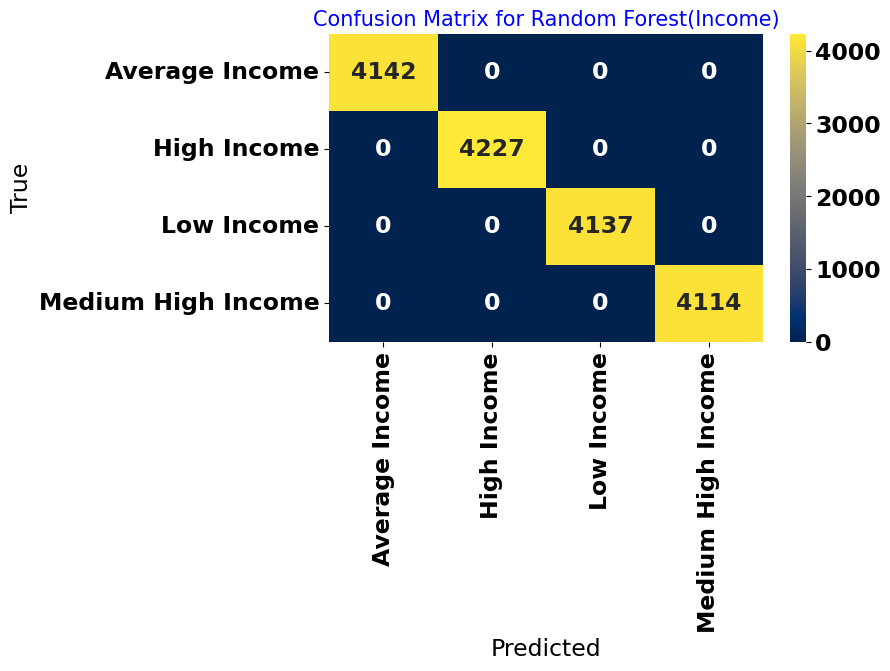

______________________________________________________________
_________________ Classification report for __________________
_________________ Random Forest ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       1.00      1.00      1.00      4142
       High Income       1.00      1.00      1.00      4227
        Low Income       1.00      1.00      1.00      4137
Medium High Income       1.00      1.00      1.00      4114

          accuracy                           1.00     16620
         macro avg       1.00      1.00      1.00     16620
      weighted avg       1.00      1.00      1.00     16620

                         Logistic Regression 
Train Accuracy:  95.65
Test Accuracy:  95.62


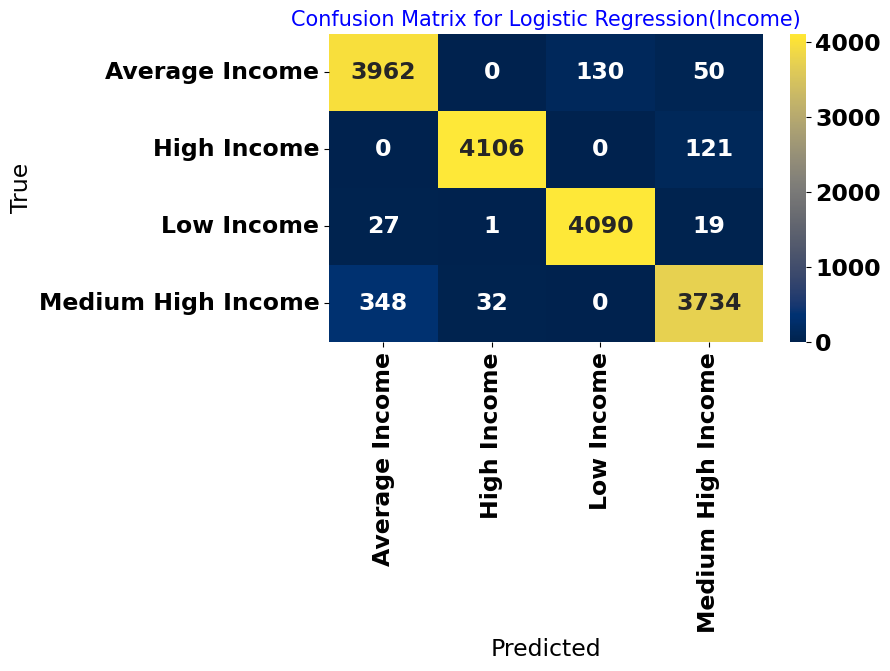

______________________________________________________________
_________________ Classification report for __________________
_________________ Logistic Regression ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       0.91      0.96      0.93      4142
       High Income       0.99      0.97      0.98      4227
        Low Income       0.97      0.99      0.98      4137
Medium High Income       0.95      0.91      0.93      4114

          accuracy                           0.96     16620
         macro avg       0.96      0.96      0.96     16620
      weighted avg       0.96      0.96      0.96     16620

                         Decision Tree 
Train Accuracy:  100.0
Test Accuracy:  100.0


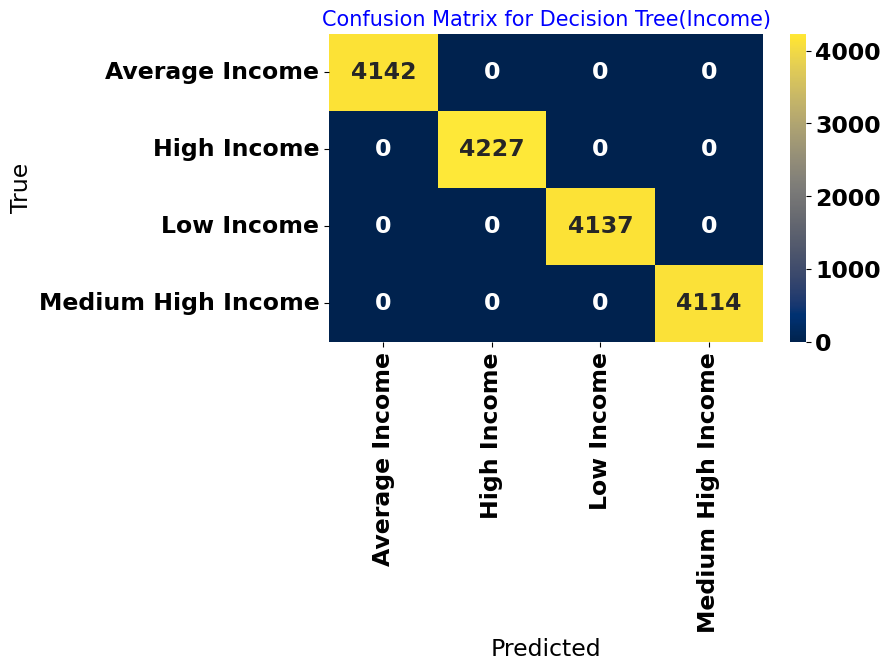

______________________________________________________________
_________________ Classification report for __________________
_________________ Decision Tree ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       1.00      1.00      1.00      4142
       High Income       1.00      1.00      1.00      4227
        Low Income       1.00      1.00      1.00      4137
Medium High Income       1.00      1.00      1.00      4114

          accuracy                           1.00     16620
         macro avg       1.00      1.00      1.00     16620
      weighted avg       1.00      1.00      1.00     16620

                         Naive Bayes 
Train Accuracy:  40.99
Test Accuracy:  41.15


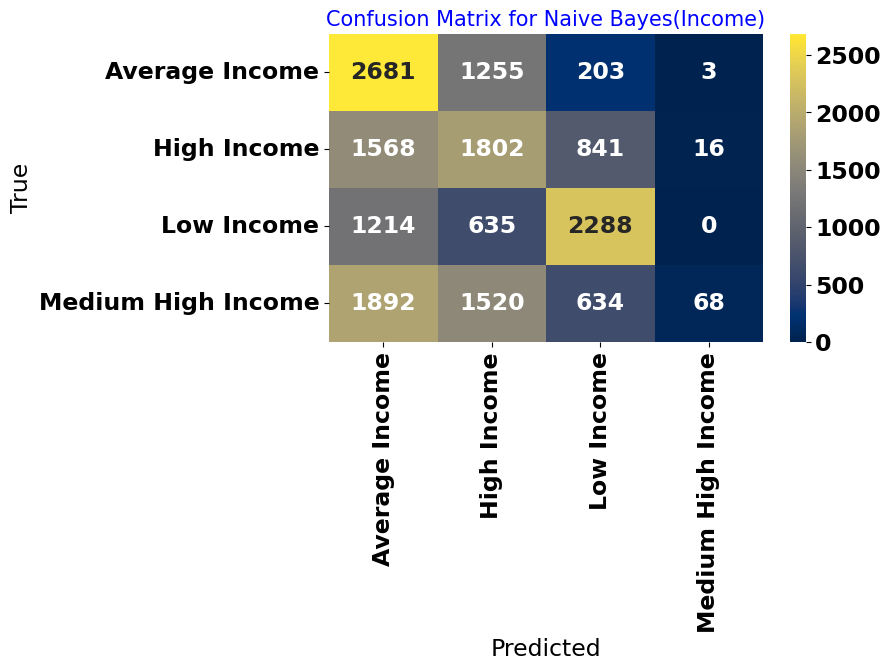

______________________________________________________________
_________________ Classification report for __________________
_________________ Naive Bayes ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       0.36      0.65      0.47      4142
       High Income       0.35      0.43      0.38      4227
        Low Income       0.58      0.55      0.56      4137
Medium High Income       0.78      0.02      0.03      4114

          accuracy                           0.41     16620
         macro avg       0.52      0.41      0.36     16620
      weighted avg       0.52      0.41      0.36     16620

                         SVC 
Train Accuracy:  87.77000000000001
Test Accuracy:  87.96000000000001


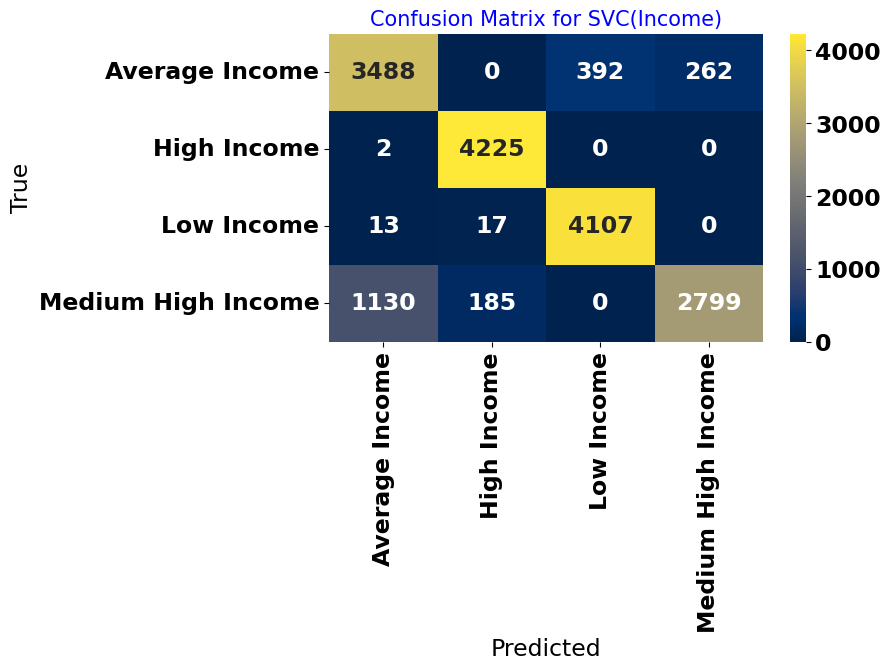

______________________________________________________________
_________________ Classification report for __________________
_________________ SVC ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       0.75      0.84      0.79      4142
       High Income       0.95      1.00      0.98      4227
        Low Income       0.91      0.99      0.95      4137
Medium High Income       0.91      0.68      0.78      4114

          accuracy                           0.88     16620
         macro avg       0.88      0.88      0.88     16620
      weighted avg       0.88      0.88      0.88     16620

                         ANN 
Train Accuracy:  99.63
Test Accuracy:  99.63


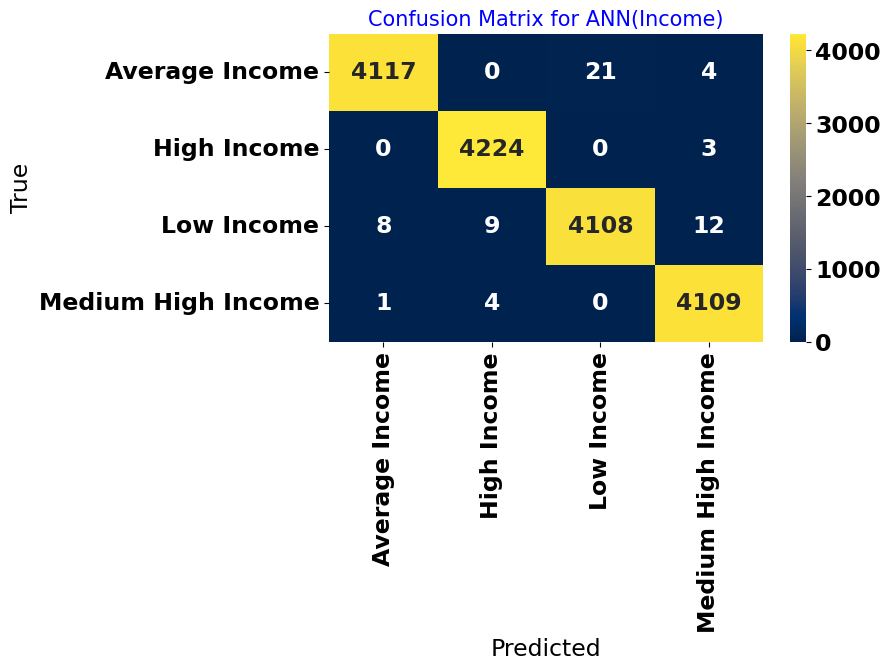

______________________________________________________________
_________________ Classification report for __________________
_________________ ANN ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       1.00      0.99      1.00      4142
       High Income       1.00      1.00      1.00      4227
        Low Income       0.99      0.99      0.99      4137
Medium High Income       1.00      1.00      1.00      4114

          accuracy                           1.00     16620
         macro avg       1.00      1.00      1.00     16620
      weighted avg       1.00      1.00      1.00     16620



In [24]:
def MatViz(ytest,ypred,model,TYPS):
    clsdt=numpy.unique(numpy.array(ytest))
    cmintr=pandas.crosstab(ytest,ypred,rownames=['True'], colnames=['Predicted'], margins=True)
    plt.figure(figsize=(7,4))
    plt.title("Confusion Matrix for {}({})".format(model,TYPS), fontsize=15,color="b")
    seaborn.heatmap(cmintr.iloc[:len(clsdt),:len(clsdt)],fmt="d",annot=True,cmap="cividis")
    plt.show()
    return cmintr

ResMt_Inc=[[],[],[],[],[],[],[]]
print("================================================================================================")
print("                        Annual Income Prediction")
print("================================================================================================")

for i in range(len(IncClsfs)):
    print("                         {} ".format(IDsClsfs[i]))
    print("================================================================================================")
    mdlinc = IncClsfs[i]   
    mdlinc.fit(Trn_IncX, Trn_IncY)
    t1 = datetime.datetime.now() 
    inc_prdct=mdlinc.predict(Tst_IncX)
    t2 = datetime.datetime.now()
    delta = t2 - t1
    predtime=delta.total_seconds()
    inc_prdct_tr=mdlinc.predict(Trn_IncX)
    idacr=metrics.accuracy_score(Tst_IncY,inc_prdct)
    print("Train Accuracy: ",round(mdlinc.score(Trn_IncX,Trn_IncY),4)*100)
    print("Test Accuracy: ",round(mdlinc.score(Tst_IncX,Tst_IncY),4)*100)
    ResMt_Inc[0].append(round(mdlinc.score(Trn_IncX,Trn_IncY),4)*100)
    ResMt_Inc[1].append(round(idacr,4)*100)
    ResMt_Inc[2].append(abs(round(metrics.accuracy_score(Trn_IncY,inc_prdct_tr),4)*100-round(metrics.accuracy_score(Tst_IncY,inc_prdct),4)*100))
    ResMt_Inc[3].append(round(metrics.precision_score(Tst_IncY,inc_prdct,average="weighted"),4)*100)
    ResMt_Inc[4].append(round(metrics.recall_score(Tst_IncY,inc_prdct,average="weighted"),4)*100)
    ResMt_Inc[5].append(round(metrics.f1_score(Tst_IncY,inc_prdct,average="weighted"),4)*100)
    ResMt_Inc[6].append(predtime)
    print("================================================================================================")
    MatViz(Tst_IncY,inc_prdct,IDsClsfs[i],"Income")
    print("______________________________________________________________")
    print("_________________ Classification report for __________________")
    print("_________________ {} ______________".format(IDsClsfs[i]))
    print("______________________________________________________________")
    print(metrics.classification_report(Tst_IncY,inc_prdct))
    print("================================================================================================")

DFIncRes=pandas.DataFrame({
    "Models":IDsClsfs,
    "Train Accuracy":ResMt_Inc[0],
    "Test Accuracy":ResMt_Inc[1],
    "Overfit":ResMt_Inc[2],
    "Precision":ResMt_Inc[3],
    "Recall":ResMt_Inc[4],
    "F1-Score":ResMt_Inc[5],
    "Prediction Time":ResMt_Inc[6],
})
DFIncRes=DFIncRes.sort_values(by="Test Accuracy",ascending=False)

for i in DFIncRes.columns.tolist()[2:]:
    incimg = px.bar(DFIncRes, y=i, x="Models",
             text=i,color="Models",title="{} Comparison for Income Prediction".format(i),height=400,width=600)
    incimg.show()

In [25]:
DFIncRes

Models  Train Accuracy  Test Accuracy  Overfit  Precision  \
0        Random Forest          100.00         100.00     0.00     100.00   
2        Decision Tree          100.00         100.00     0.00     100.00   
5                  ANN           99.63          99.63     0.00      99.63   
1  Logistic Regression           95.65          95.62     0.03      95.68   
4                  SVC           87.77          87.96     0.19      88.39   
3          Naive Bayes           40.99          41.15     0.16      51.59   

   Recall  F1-Score  Prediction Time  
0  100.00    100.00         0.094517  
2  100.00    100.00         0.002000  
5   99.63     99.63         0.009997  
1   95.62     95.62         0.002504  
4   87.96     87.63         0.004002  
3   41.15     36.19         0.004006

## Design Hybrid Model and Prediction

                        Annual Income Prediction
                         Random Forest 
Train Accuracy:  100.0
Test Accuracy:  100.0


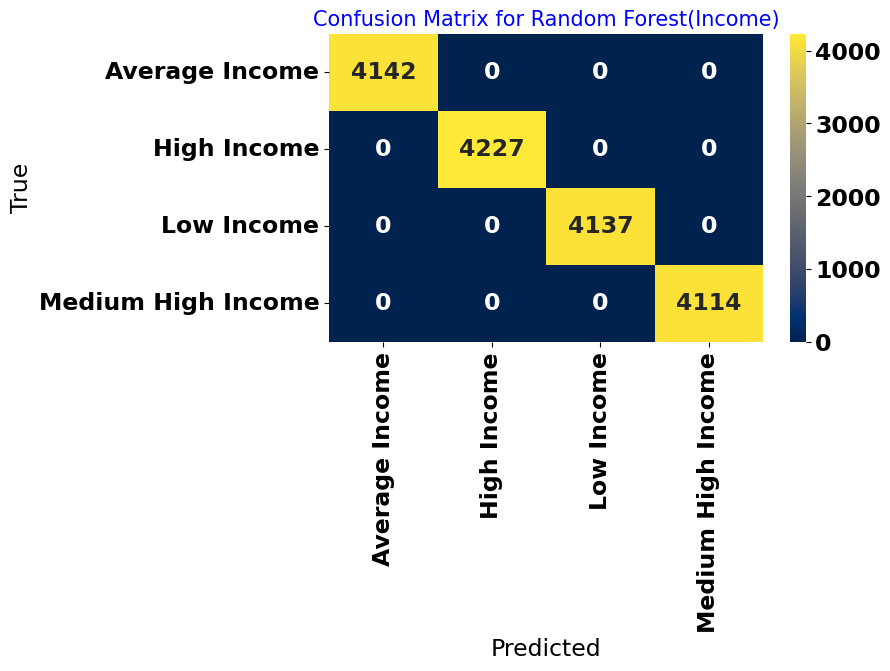

______________________________________________________________
_________________ Classification report for __________________
_________________ Random Forest ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       1.00      1.00      1.00      4142
       High Income       1.00      1.00      1.00      4227
        Low Income       1.00      1.00      1.00      4137
Medium High Income       1.00      1.00      1.00      4114

          accuracy                           1.00     16620
         macro avg       1.00      1.00      1.00     16620
      weighted avg       1.00      1.00      1.00     16620

                         Logistic Regression 
Train Accuracy:  95.65
Test Accuracy:  95.62


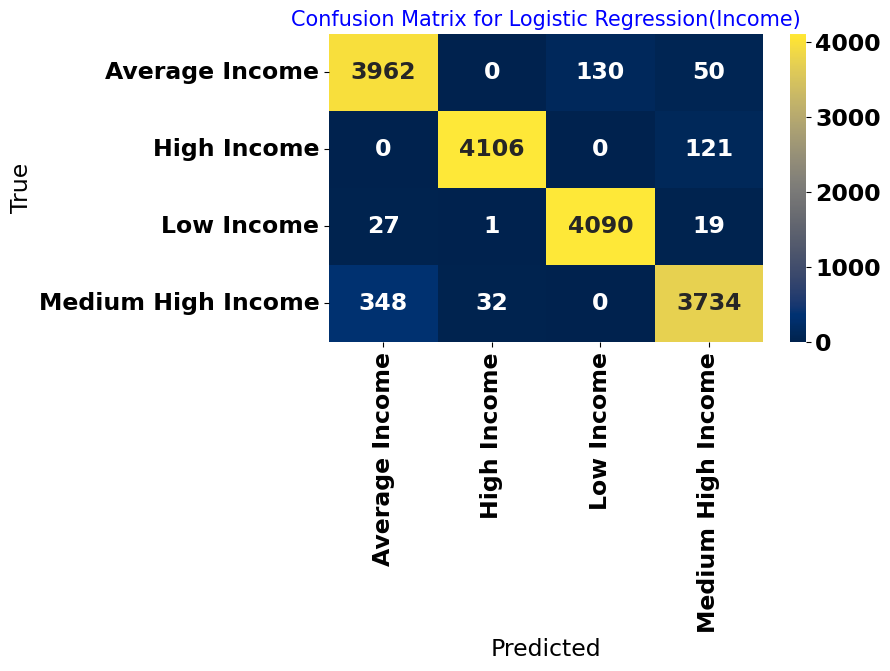

______________________________________________________________
_________________ Classification report for __________________
_________________ Logistic Regression ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       0.91      0.96      0.93      4142
       High Income       0.99      0.97      0.98      4227
        Low Income       0.97      0.99      0.98      4137
Medium High Income       0.95      0.91      0.93      4114

          accuracy                           0.96     16620
         macro avg       0.96      0.96      0.96     16620
      weighted avg       0.96      0.96      0.96     16620

                         Decision Tree 
Train Accuracy:  100.0
Test Accuracy:  100.0


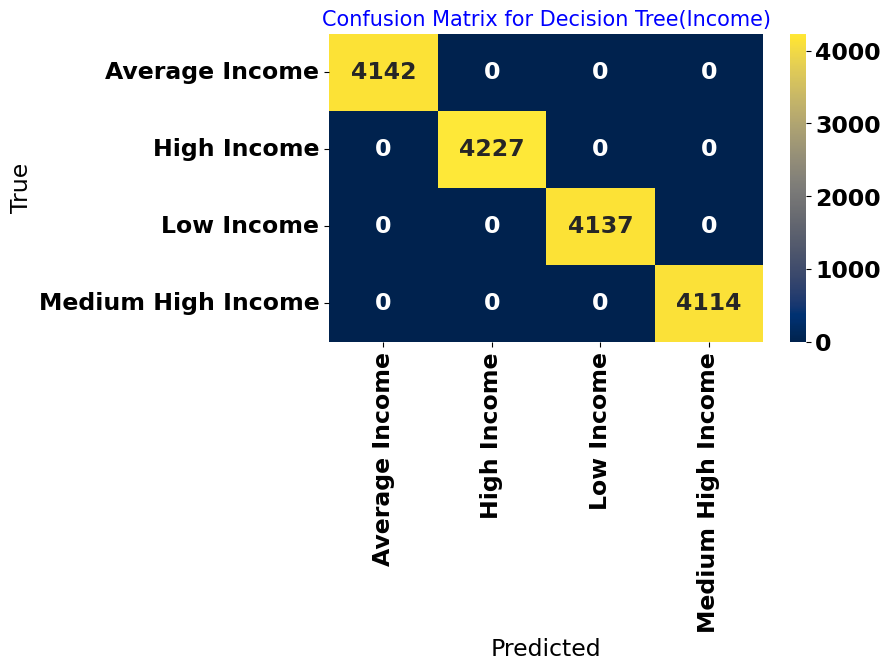

______________________________________________________________
_________________ Classification report for __________________
_________________ Decision Tree ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       1.00      1.00      1.00      4142
       High Income       1.00      1.00      1.00      4227
        Low Income       1.00      1.00      1.00      4137
Medium High Income       1.00      1.00      1.00      4114

          accuracy                           1.00     16620
         macro avg       1.00      1.00      1.00     16620
      weighted avg       1.00      1.00      1.00     16620

                         Naive Bayes 
Train Accuracy:  40.99
Test Accuracy:  41.15


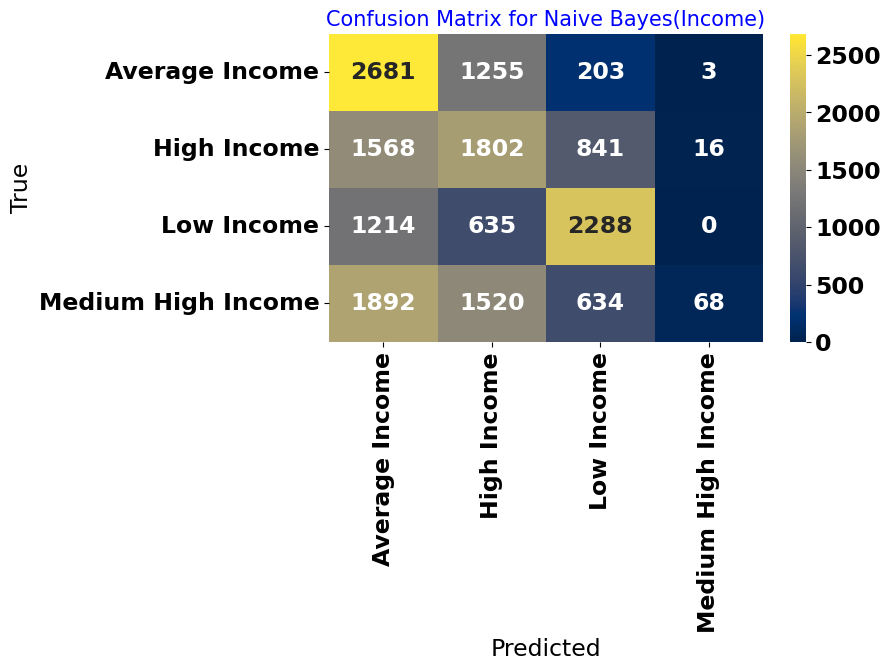

______________________________________________________________
_________________ Classification report for __________________
_________________ Naive Bayes ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       0.36      0.65      0.47      4142
       High Income       0.35      0.43      0.38      4227
        Low Income       0.58      0.55      0.56      4137
Medium High Income       0.78      0.02      0.03      4114

          accuracy                           0.41     16620
         macro avg       0.52      0.41      0.36     16620
      weighted avg       0.52      0.41      0.36     16620

                         SVC 
Train Accuracy:  87.77000000000001
Test Accuracy:  87.96000000000001


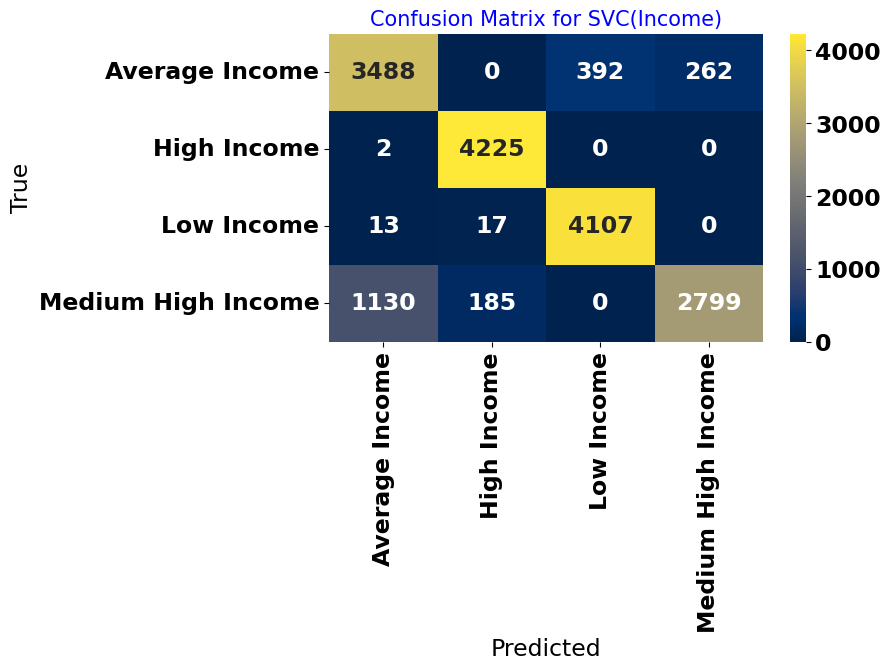

______________________________________________________________
_________________ Classification report for __________________
_________________ SVC ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       0.75      0.84      0.79      4142
       High Income       0.95      1.00      0.98      4227
        Low Income       0.91      0.99      0.95      4137
Medium High Income       0.91      0.68      0.78      4114

          accuracy                           0.88     16620
         macro avg       0.88      0.88      0.88     16620
      weighted avg       0.88      0.88      0.88     16620

                         ANN 
Train Accuracy:  99.65
Test Accuracy:  99.65


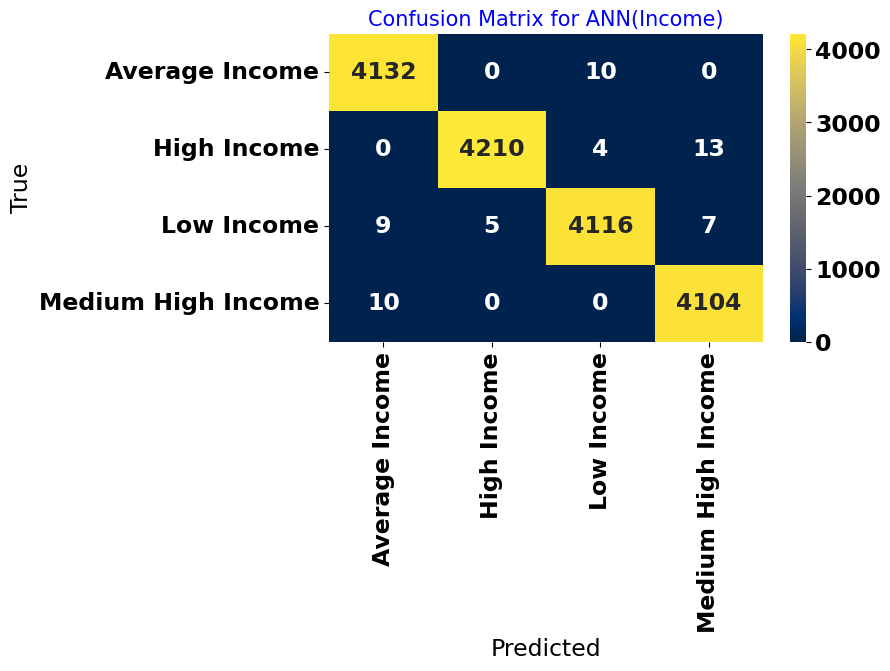

______________________________________________________________
_________________ Classification report for __________________
_________________ ANN ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       1.00      1.00      1.00      4142
       High Income       1.00      1.00      1.00      4227
        Low Income       1.00      0.99      1.00      4137
Medium High Income       1.00      1.00      1.00      4114

          accuracy                           1.00     16620
         macro avg       1.00      1.00      1.00     16620
      weighted avg       1.00      1.00      1.00     16620

                         Hybrid Model 
Train Accuracy:  99.72999999999999
Test Accuracy:  99.71


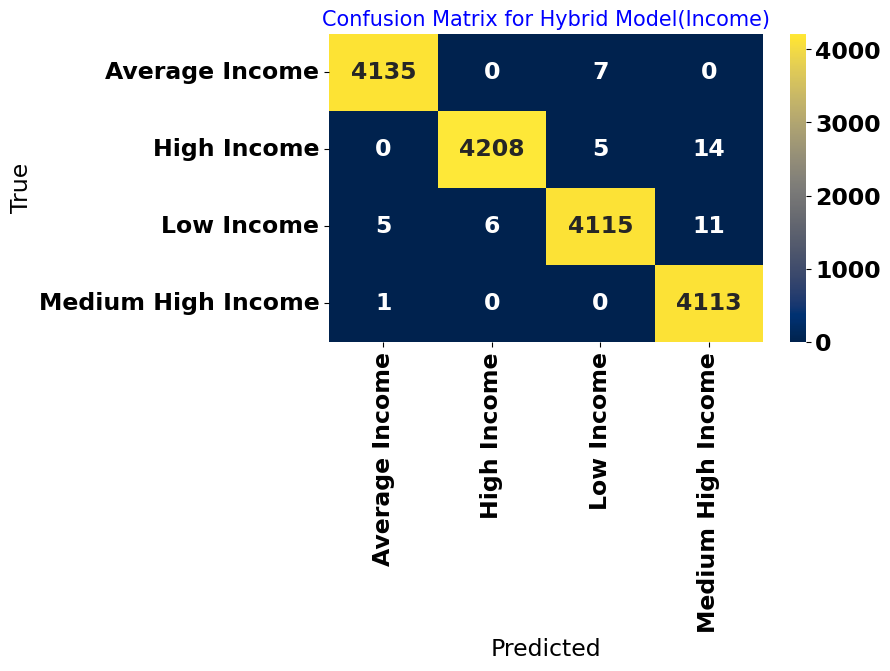

______________________________________________________________
_________________ Classification report for __________________
_________________ Hybrid Model ______________
______________________________________________________________
                    precision    recall  f1-score   support

    Average Income       1.00      1.00      1.00      4142
       High Income       1.00      1.00      1.00      4227
        Low Income       1.00      0.99      1.00      4137
Medium High Income       0.99      1.00      1.00      4114

          accuracy                           1.00     16620
         macro avg       1.00      1.00      1.00     16620
      weighted avg       1.00      1.00      1.00     16620



In [26]:
Hybrid=ensemble.StackingClassifier(estimators=[
        ('Model-1', linear_model.LogisticRegression()),
        ('Model-2',neural_network.MLPClassifier())], 
                                final_estimator=neural_network.MLPClassifier())
if "Hybrid Model" not in IDsClsfs:
    IncClsfs.append(Hybrid)
    IDsClsfs.append("Hybrid Model")

ResMt_Inc_fin=[[],[],[],[],[],[],[]]
print("================================================================================================")
print("                        Annual Income Prediction")
print("================================================================================================")

for i in range(len(IncClsfs)):
    print("                         {} ".format(IDsClsfs[i]))
    print("================================================================================================")
    mdlinc = IncClsfs[i]   
    mdlinc.fit(Trn_IncX, Trn_IncY)
    t1 = datetime.datetime.now() 
    inc_prdct=mdlinc.predict(Tst_IncX)
    t2 = datetime.datetime.now()
    delta = t2 - t1
    predtime=delta.total_seconds()
    inc_prdct_tr=mdlinc.predict(Trn_IncX)
    idacr=metrics.accuracy_score(Tst_IncY,inc_prdct)
    print("Train Accuracy: ",round(mdlinc.score(Trn_IncX,Trn_IncY),4)*100)
    print("Test Accuracy: ",round(mdlinc.score(Tst_IncX,Tst_IncY),4)*100)
    ResMt_Inc_fin[0].append(round(mdlinc.score(Trn_IncX,Trn_IncY),4)*100)
    ResMt_Inc_fin[1].append(round(idacr,4)*100)
    ResMt_Inc_fin[2].append(abs(round(metrics.accuracy_score(Trn_IncY,inc_prdct_tr),4)*100-round(metrics.accuracy_score(Tst_IncY,inc_prdct),4)*100))
    ResMt_Inc_fin[3].append(round(metrics.precision_score(Tst_IncY,inc_prdct,average="weighted"),4)*100)
    ResMt_Inc_fin[4].append(round(metrics.recall_score(Tst_IncY,inc_prdct,average="weighted"),4)*100)
    ResMt_Inc_fin[5].append(round(metrics.f1_score(Tst_IncY,inc_prdct,average="weighted"),4)*100)
    ResMt_Inc_fin[6].append(predtime)
    print("================================================================================================")
    MatViz(Tst_IncY,inc_prdct,IDsClsfs[i],"Income")
    print("______________________________________________________________")
    print("_________________ Classification report for __________________")
    print("_________________ {} ______________".format(IDsClsfs[i]))
    print("______________________________________________________________")
    print(metrics.classification_report(Tst_IncY,inc_prdct))
    print("================================================================================================")

DFIncRes_Fin=pandas.DataFrame({
    "Models":IDsClsfs,
    "Train Accuracy":ResMt_Inc_fin[0],
    "Test Accuracy":ResMt_Inc_fin[1],
    "Overfit":ResMt_Inc_fin[2],
    "Precision":ResMt_Inc_fin[3],
    "Recall":ResMt_Inc_fin[4],
    "F1-Score":ResMt_Inc_fin[5],
    "Prediction Time":ResMt_Inc_fin[6],
})
DFIncRes_Fin=DFIncRes_Fin.sort_values(by="Test Accuracy",ascending=False)

for i in DFIncRes_Fin.columns.tolist()[2:]:
    incimg = px.bar(DFIncRes_Fin, y=i, x="Models",
             text=i,color="Models",title="{} Comparison for Income Prediction".format(i),height=400,width=600)
    incimg.show()

In [27]:
DFIncRes_Fin=DFIncRes_Fin.reset_index(drop=True)
DFIncRes_Fin

Models  Train Accuracy  Test Accuracy  Overfit  Precision  \
0        Random Forest          100.00         100.00     0.00     100.00   
1        Decision Tree          100.00         100.00     0.00     100.00   
2         Hybrid Model           99.73          99.71     0.02      99.71   
3                  ANN           99.65          99.65     0.00      99.65   
4  Logistic Regression           95.65          95.62     0.03      95.68   
5                  SVC           87.77          87.96     0.19      88.39   
6          Naive Bayes           40.99          41.15     0.16      51.59   

   Recall  F1-Score  Prediction Time  
0  100.00    100.00         0.092670  
1  100.00    100.00         0.002000  
2   99.71     99.71         0.026036  
3   99.65     99.65         0.009305  
4   95.62     95.62         0.002316  
5   87.96     87.63         0.001510  
6   41.15     36.19         0.003999

In [28]:
DFIncRes_FinF1=DFIncRes_Fin[DFIncRes_Fin['Test Accuracy']<100].reset_index(drop=True)
DFIncRes_FinF1

Models  Train Accuracy  Test Accuracy  Overfit  Precision  \
0         Hybrid Model           99.73          99.71     0.02      99.71   
1                  ANN           99.65          99.65     0.00      99.65   
2  Logistic Regression           95.65          95.62     0.03      95.68   
3                  SVC           87.77          87.96     0.19      88.39   
4          Naive Bayes           40.99          41.15     0.16      51.59   

   Recall  F1-Score  Prediction Time  
0   99.71     99.71         0.026036  
1   99.65     99.65         0.009305  
2   95.62     95.62         0.002316  
3   87.96     87.63         0.001510  
4   41.15     36.19         0.003999

In [29]:
DFIncRes_FinF2=DFIncRes_FinF1[DFIncRes_FinF1['Test Accuracy']>95].reset_index(drop=True)
DFIncRes_FinF2

Models  Train Accuracy  Test Accuracy  Overfit  Precision  \
0         Hybrid Model           99.73          99.71     0.02      99.71   
1                  ANN           99.65          99.65     0.00      99.65   
2  Logistic Regression           95.65          95.62     0.03      95.68   

   Recall  F1-Score  Prediction Time  
0   99.71     99.71         0.026036  
1   99.65     99.65         0.009305  
2   95.62     95.62         0.002316

In [30]:
DFIncRes_FinF3=DFIncRes_FinF2[DFIncRes_FinF2['Test Accuracy']==max(DFIncRes_FinF2['Test Accuracy'])].reset_index(drop=True)
DFIncRes_FinF3

Models  Train Accuracy  Test Accuracy  Overfit  Precision  Recall  \
0  Hybrid Model           99.73          99.71     0.02      99.71   99.71   

   F1-Score  Prediction Time  
0     99.71         0.026036

In [31]:
Hybrid

StackingClassifier(estimators=[('Model-1', LogisticRegression()),
                               ('Model-2', MLPClassifier())],
                   final_estimator=MLPClassifier())

## Model Validation

Validation Result With 50 Validation Samples
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


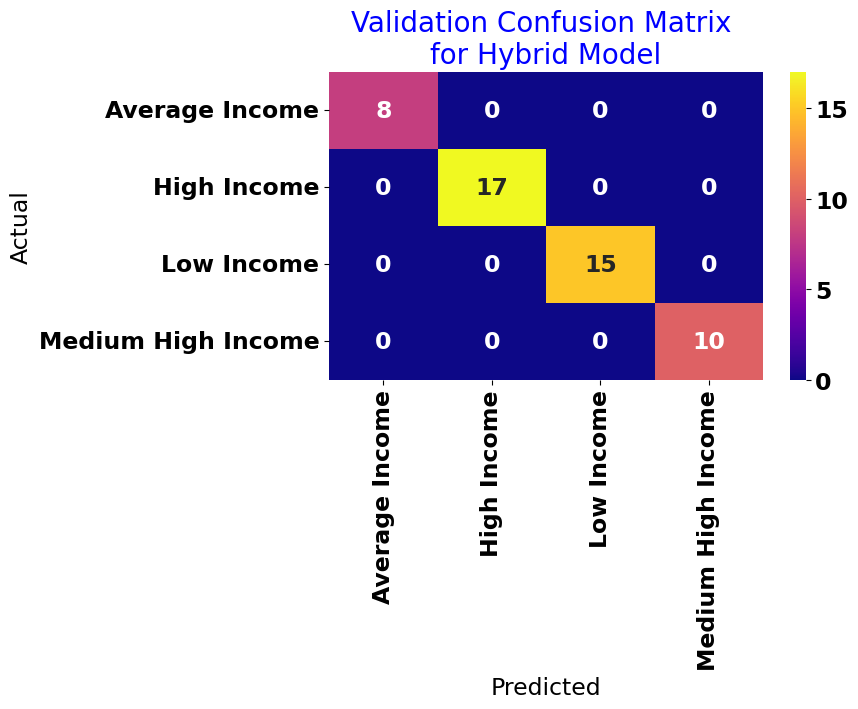

Validation Result With 100 Validation Samples
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


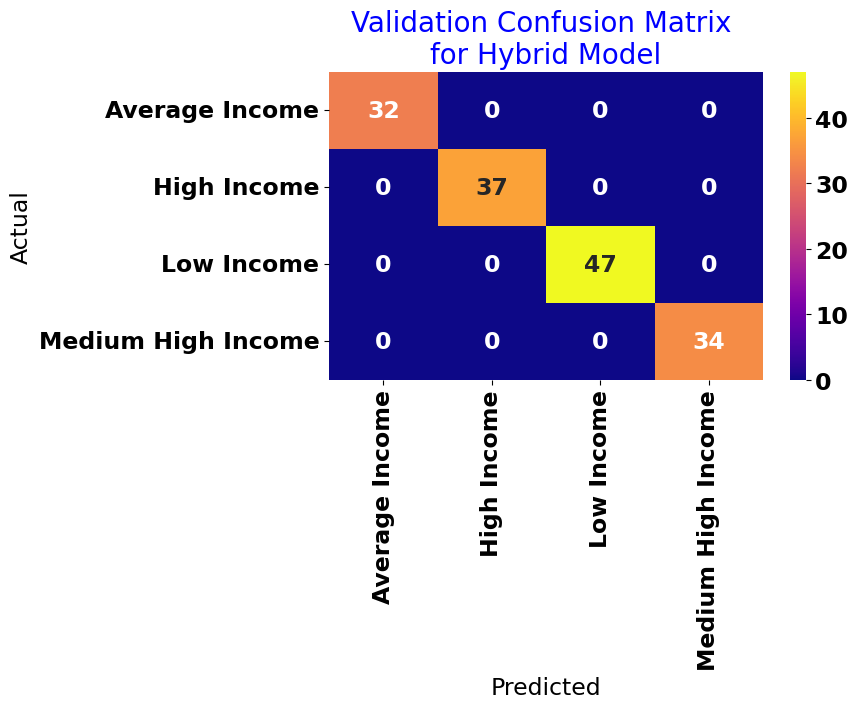

Validation Result With 150 Validation Samples
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


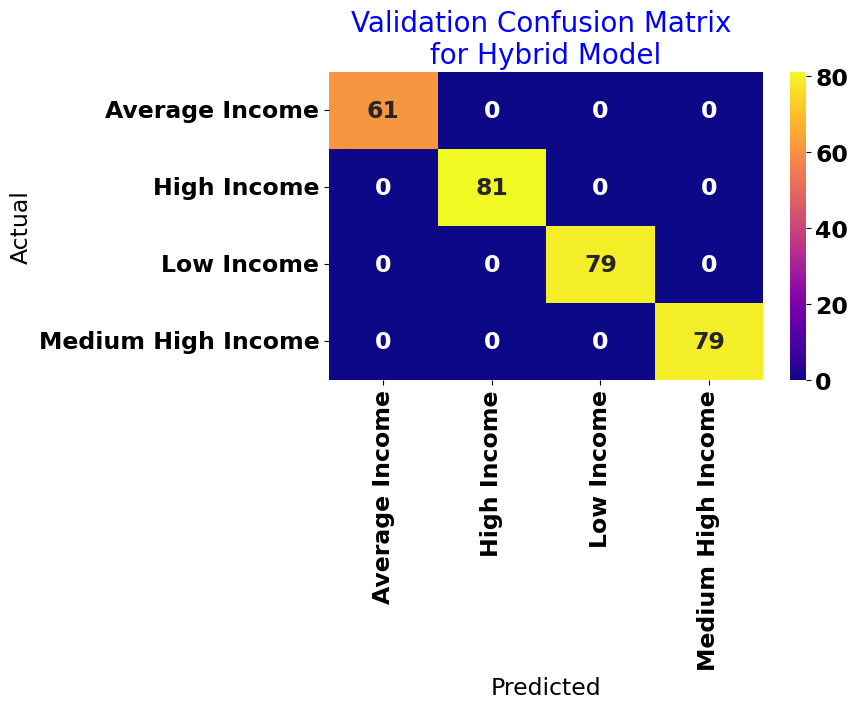

Validation Result With 200 Validation Samples
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


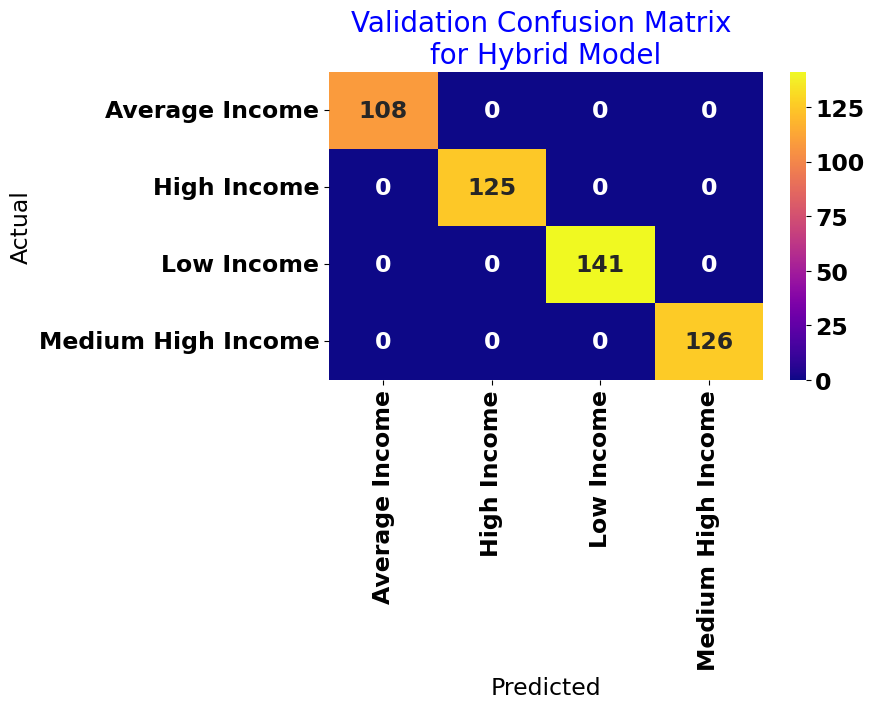

Validation Result With 250 Validation Samples
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


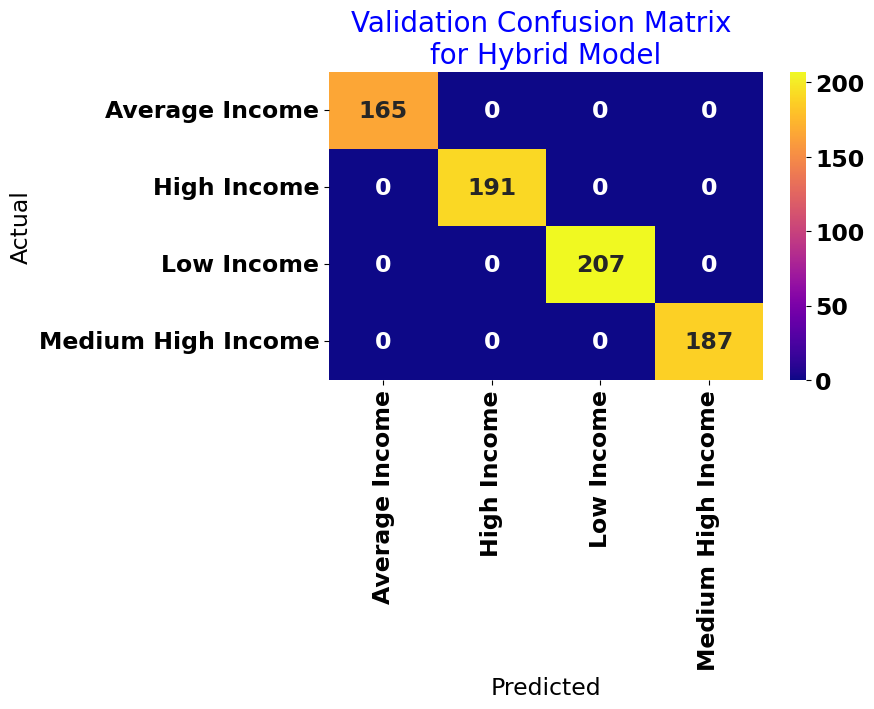

Validation Result With 300 Validation Samples
Accuracy: 99.9%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


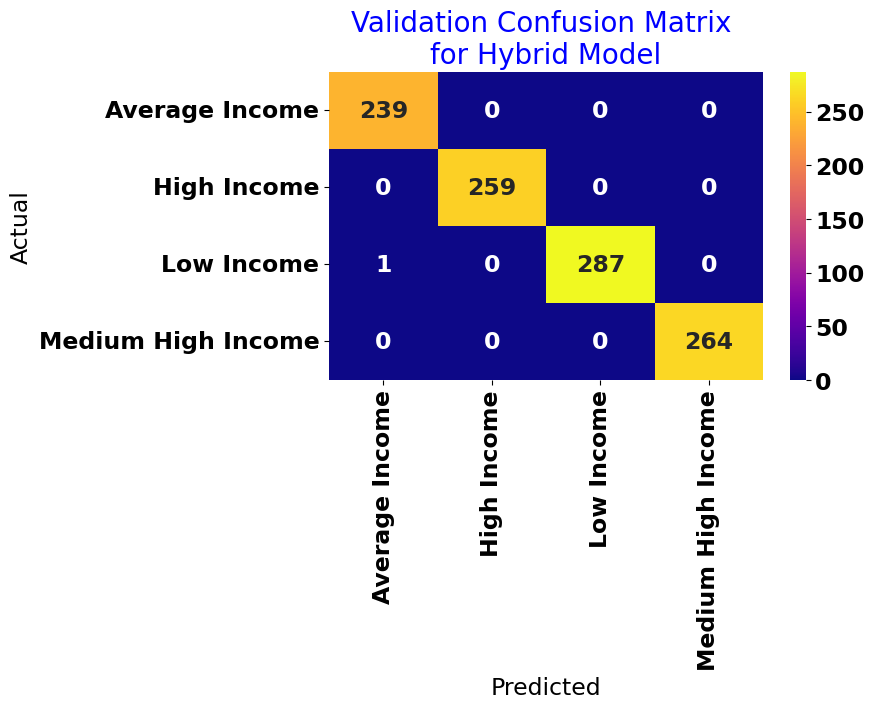

Validation Result With 350 Validation Samples
Accuracy: 99.79%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


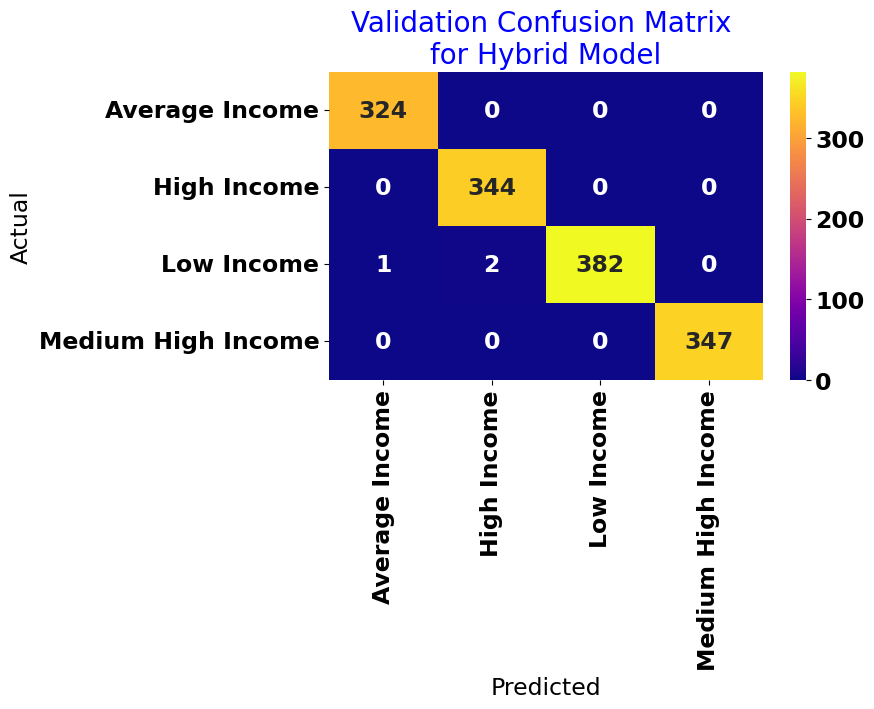

Validation Result With 400 Validation Samples
Accuracy: 99.72%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


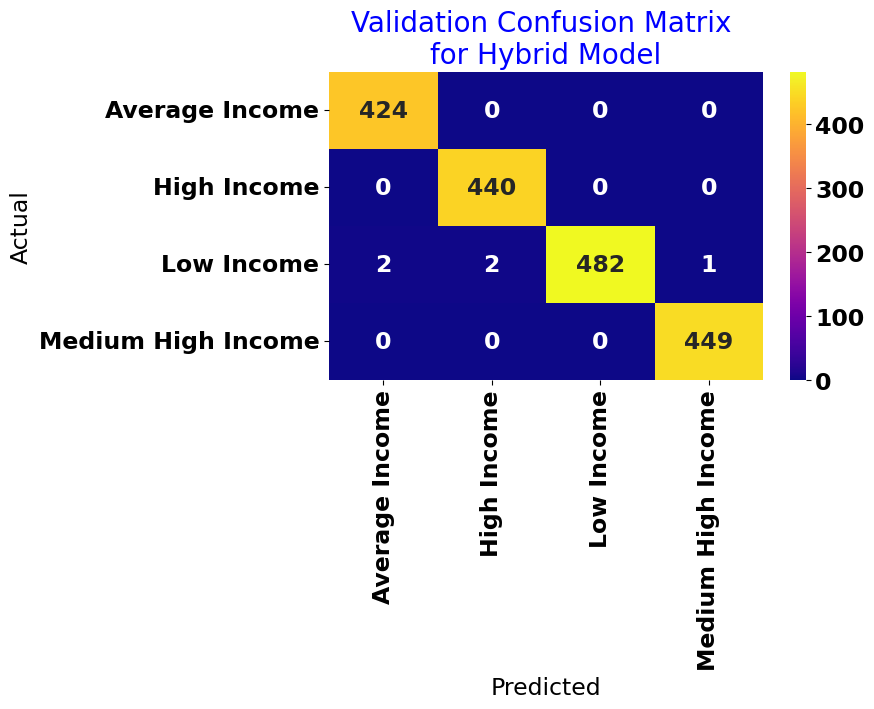

Validation Result With 450 Validation Samples
Accuracy: 99.69%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


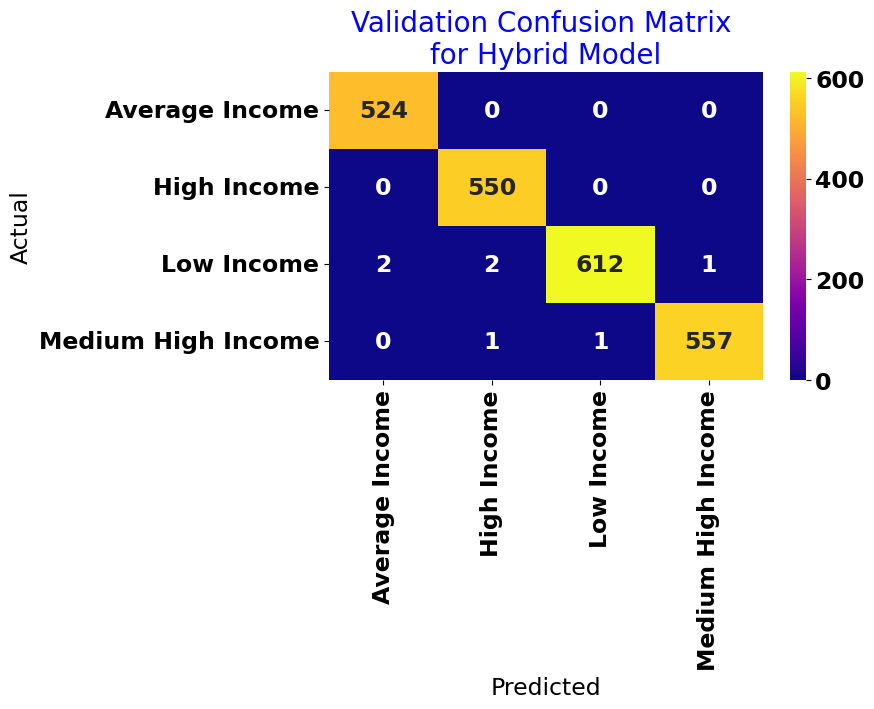

Validation Result With 500 Validation Samples
Accuracy: 99.67%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


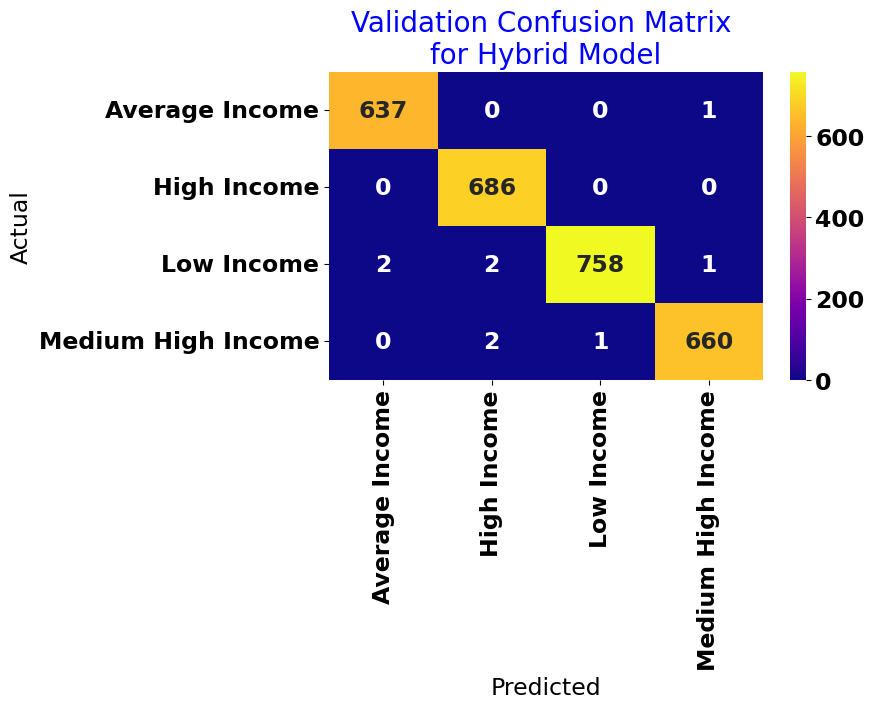

Validation Result With 550 Validation Samples
Accuracy: 99.7%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


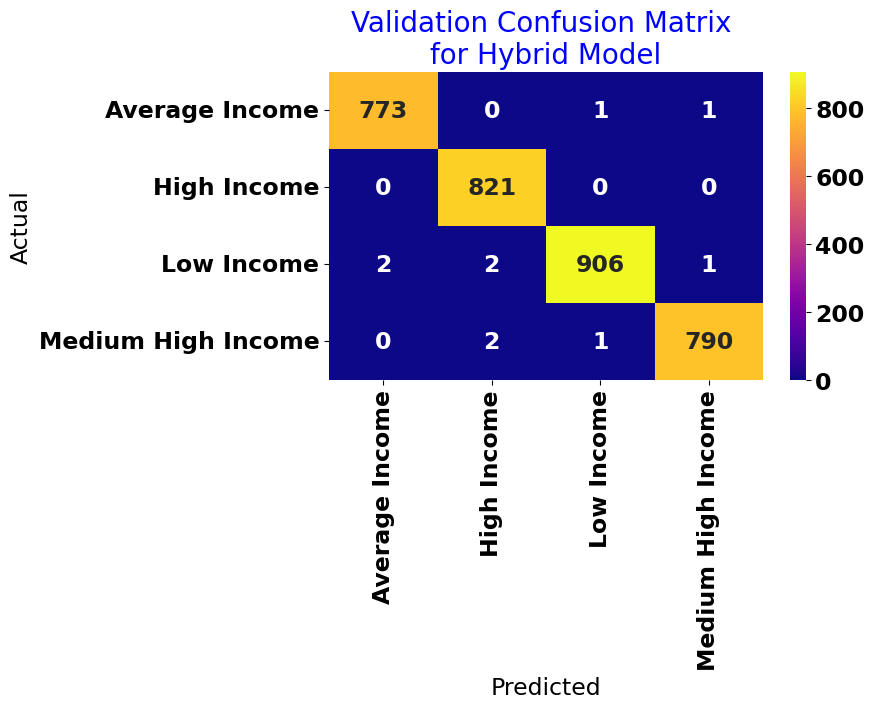

Validation Result With 600 Validation Samples
Accuracy: 99.72%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


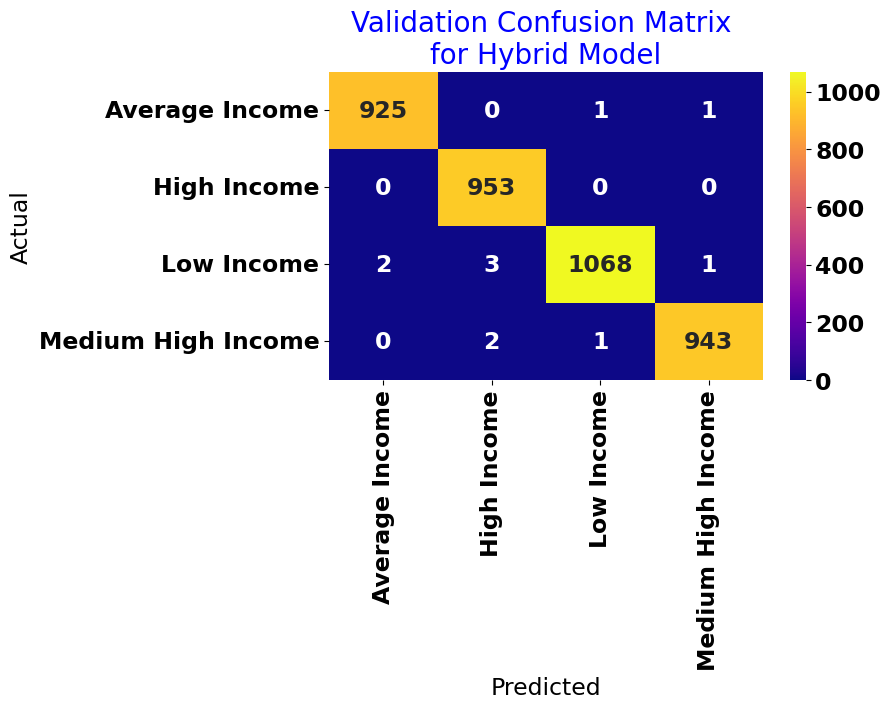

Validation Result With 650 Validation Samples
Accuracy: 99.76%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


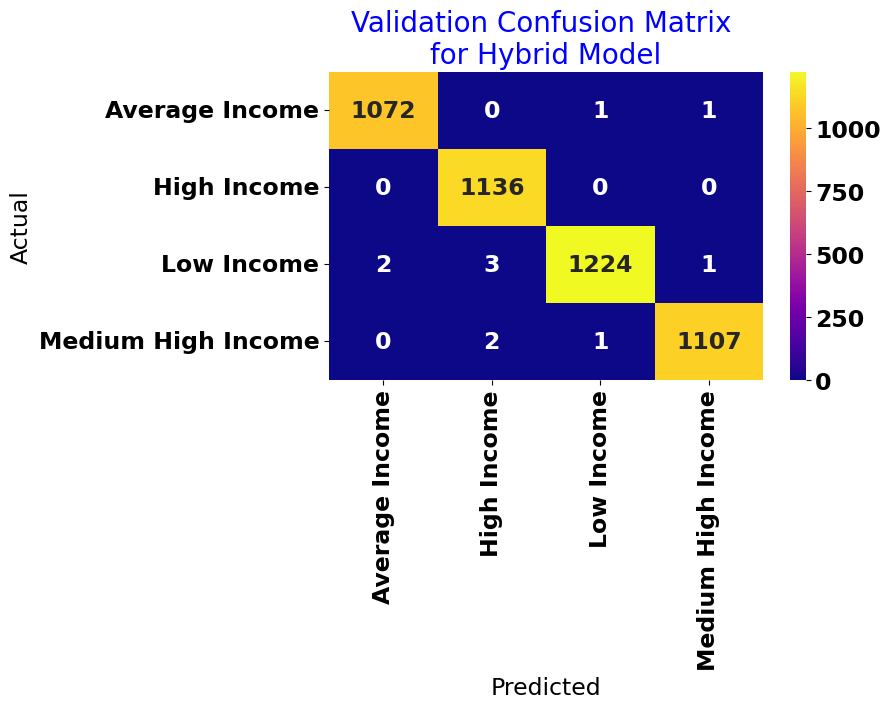

Validation Result With 700 Validation Samples
Accuracy: 99.79%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


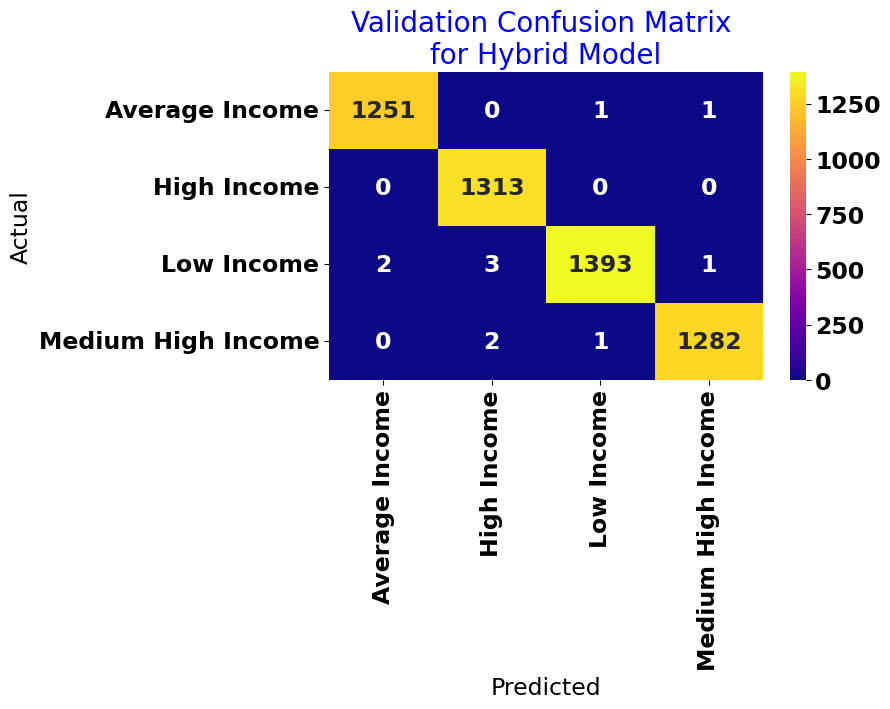

Validation Result With 750 Validation Samples
Accuracy: 99.8%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


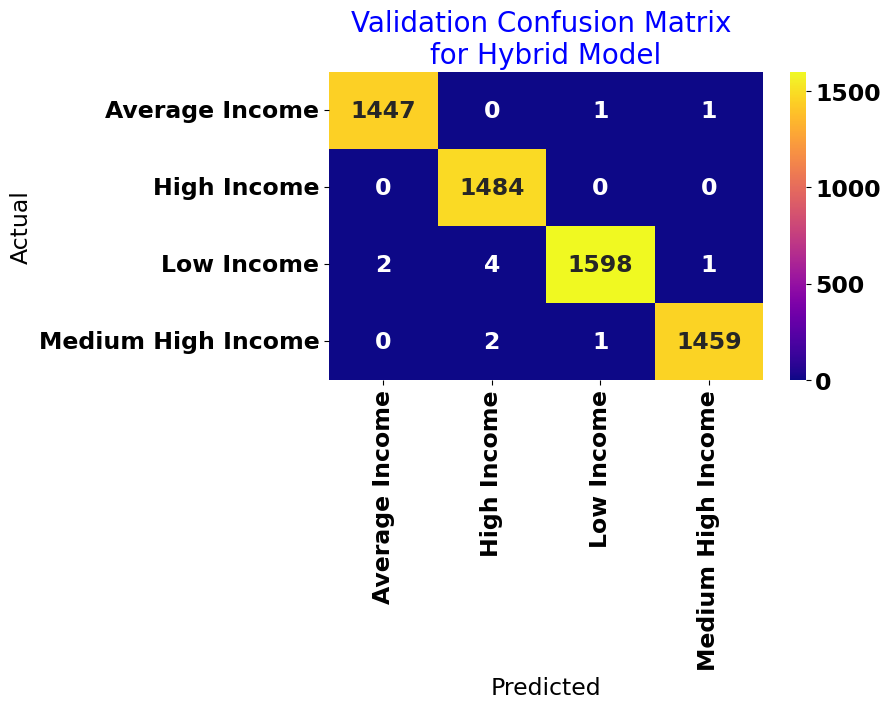

Validation Result With 800 Validation Samples
Accuracy: 99.82%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


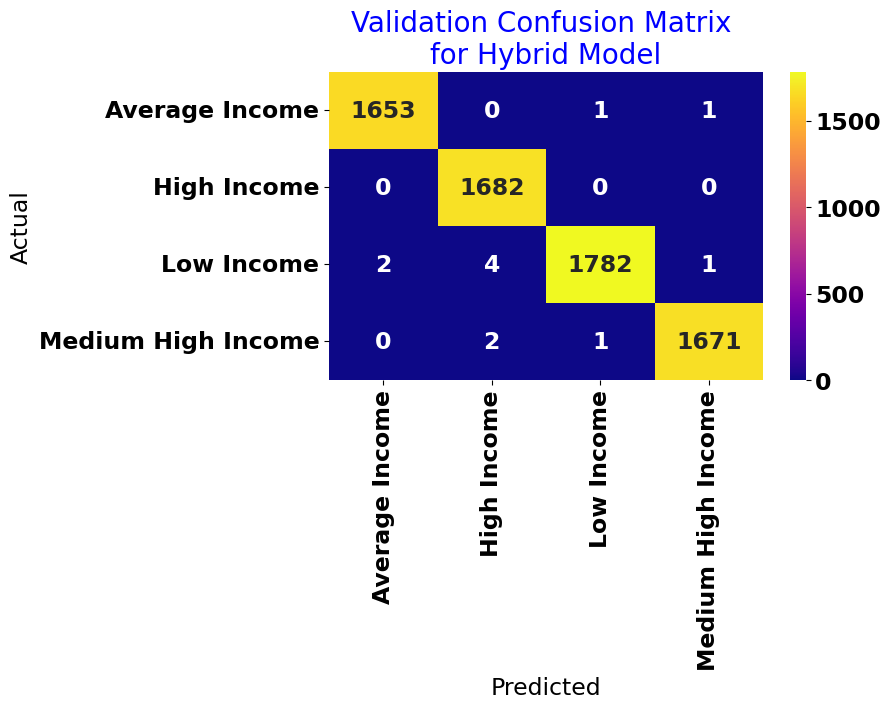

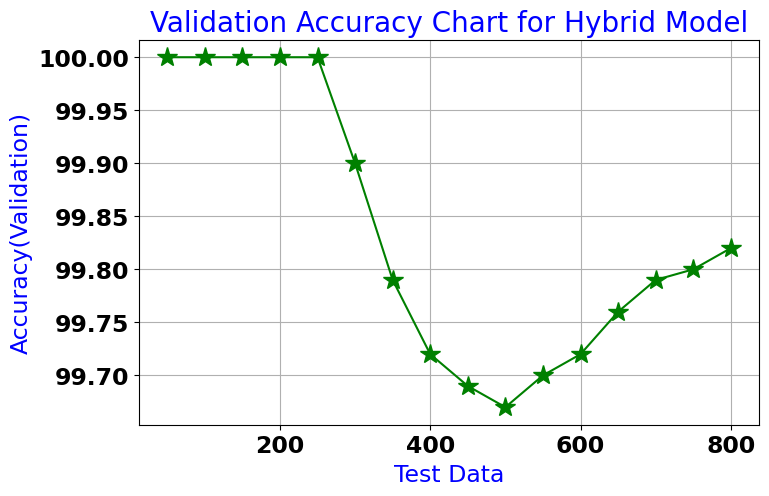

In [34]:
if 'Best_Model.sav' not in os.listdir():
    pres_best_model=Hybrid.fit(Trn_IncX, Trn_IncY)
    mdnm = 'Best_Model.sav'
    pickle.dump(pres_best_model, open(mdnm, 'wb'))
else:
    pres_best_model=pickle.load(open('Best_Model.sav', 'rb'))
Orig_class=[]
Pred_class=[]
samples=[50,100,150,200,250,300,350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
ResVal=[[],[],[],[]]
for l in samples:
    for x in range(l):
        obs=numpy.random.randint(len(Val_IncX))
        Orig_class.append(Val_IncY.iloc[obs])
        Pred_class.append(pres_best_model.predict([Val_IncX.iloc[obs]])[0])
    DfVal=pandas.DataFrame({"Actual":Orig_class,"Predicted":Pred_class})
    acvl=round(metrics.accuracy_score(DfVal["Actual"],DfVal["Predicted"])*100,2)
    mt_vl=metrics.precision_recall_fscore_support(DfVal["Actual"],DfVal["Predicted"], average='weighted')[:-1]
    print("Validation Result With {} Validation Samples\nAccuracy: {}%\nPrecision: {}%\nRecall: {}%\nF1-Score: {}%".format(l,acvl,round(mt_vl[0],2)*100,round(mt_vl[1],2)*100,round(mt_vl[2],2)*100))
    ctvl=pandas.crosstab(DfVal["Actual"],DfVal["Predicted"])
    ResVal[0].append(acvl)
    ResVal[1].append(round(mt_vl[0],2)*100)
    ResVal[2].append(round(mt_vl[1],2)*100)
    ResVal[3].append(round(mt_vl[2],2)*100)
    plt.figure(figsize=(7,4))
    plt.title("Validation Confusion Matrix \nfor Hybrid Model", fontsize=20,color="b")
    seaborn.heatmap(ctvl,fmt="d",annot=True,cmap="plasma")
    plt.show()
valdf=pandas.DataFrame({
    "Test Data":samples,
    "Accuracy":ResVal[0],
    "Precision":ResVal[1],
    "Recall":ResVal[2],
    "F1-Score":ResVal[3]
})
display(HTML(valdf.to_html()))

valdf1=valdf.set_index('Test Data')
plt.figure(figsize=(8,5))
plt.title("Validation Accuracy Chart for Hybrid Model", fontsize=20,color="b")
valdf1['Accuracy'].plot(kind='line',color="g",marker="*", markersize=15)
plt.xlabel("Test Data", fontsize=17,color="b")
plt.ylabel("Accuracy(Validation)", fontsize=17,color="b")
plt.grid()
plt.show()